In [1]:
import numpy as np 
import pandas as pd
import folium, json

# plots
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

%matplotlib inline

In [2]:
eventos = pd.read_csv('events.csv',low_memory=False)

In [3]:
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'])

### Columnas del set de datos

In [4]:
eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

### Informacion del set de datos

In [5]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region            

### Cantidad de elementos nulos por columna

In [6]:
eventos.isnull().sum().sort_values(ascending = True)

timestamp                         0
event                             0
person                            0
model                        447004
sku                          447450
condition                    447452
storage                      447452
color                        447452
skus                         789589
screen_resolution            923910
device_type                  923910
country                      923910
region                       923910
city                         923910
new_vs_returning             923910
browser_version              923910
operating_system_version     923910
channel                      923910
campaign_source              928492
url                          928532
search_engine                960331
search_term                  962321
staticpage                  1007690
dtype: int64

In [7]:
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'])

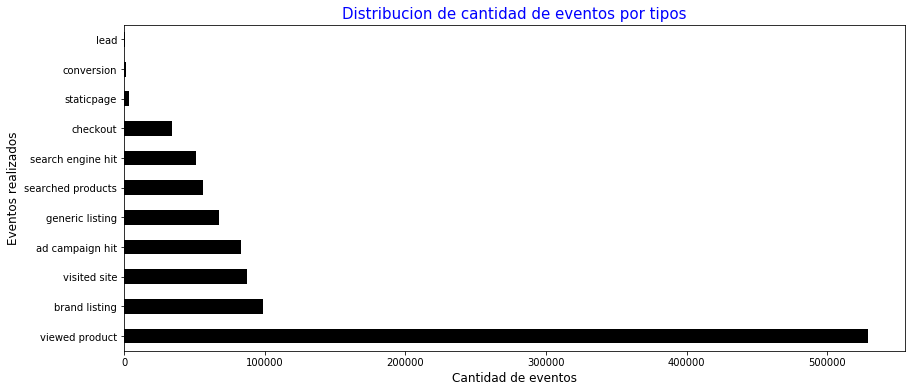

In [8]:
x = eventos['event'].value_counts().plot(kind='barh',figsize=(14,6),color = 'black')
x.set_ylabel('Eventos realizados',fontsize=12)
x.set_xlabel('Cantidad de eventos',fontsize=12)
x.set_title('Distribucion de cantidad de eventos por tipos', fontsize=15,color = 'blue')
plt.show()

### Cantidad de usuarios de Trocafone

In [9]:
eventos['person'].value_counts().sum()

1011288

### Cantidad de eventos realizados por cada usuario

In [10]:
eventos.loc[:,['person','event']].groupby('person').agg(np.size).sort_values('event',ascending = False).head(10)

,event
person,
71492f2b,2771
6b07be7b,2770
285101a1,2140
3e34b3cf,1877
2d5a84c1,1800
5f25cb5d,1797
5af7e2bc,1773
3b5a5833,1705
d7e60792,1352


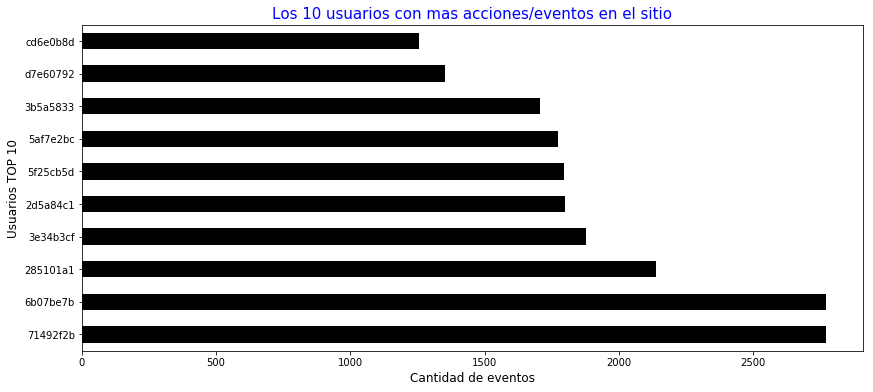

In [11]:
plot = eventos['person'].value_counts().head(10).plot(kind='barh',figsize=(14,6),color = 'black')
plot.set_ylabel('Usuarios TOP 10',fontsize=12)
plot.set_xlabel('Cantidad de eventos',fontsize=12)
plot.set_title('Los 10 usuarios con mas acciones/eventos en el sitio', fontsize=15,color = 'blue')
plt.show()

### Cantidad de eventos por año

In [12]:
eventos['timestamp'].dt.year.value_counts()

2018    1011288
Name: timestamp, dtype: int64

###### Se puede observar que todos los eventos fueron realizados en el año 2018.

## Analisis de la actividad mensual

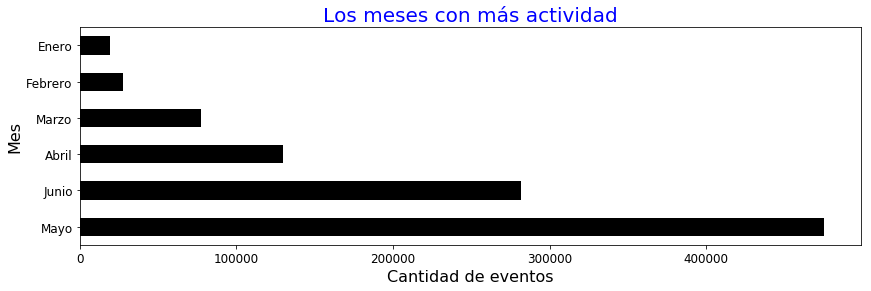

In [13]:
plot = eventos['timestamp'].dt.month.value_counts().plot(kind='barh',figsize=(14,4),color = 'black',fontsize=12)
plot.set_ylabel('Mes',fontsize=16)
plot.set_xlabel('Cantidad de eventos',fontsize=16)
plot.set_title('Los meses con más actividad', fontsize=20,color = 'blue')

plot.set_yticklabels(['Mayo','Junio','Abril','Marzo','Febrero','Enero'])

plt.show()

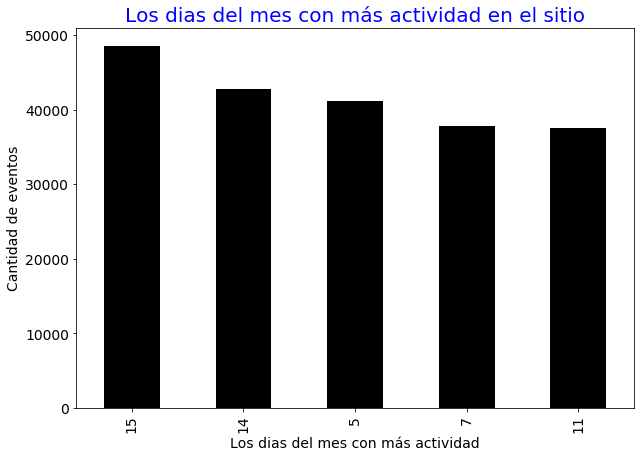

In [14]:
plot = eventos['timestamp'].dt.day.value_counts().head(5).plot(kind='bar',figsize=(10,7),color = 'black', fontsize=14)
plot.set_xlabel('Los dias del mes con más actividad',fontsize=14)
plot.set_ylabel('Cantidad de eventos',fontsize=14)
plot.set_title('Los dias del mes con más actividad en el sitio', fontsize=20,color = 'blue')
plt.show()

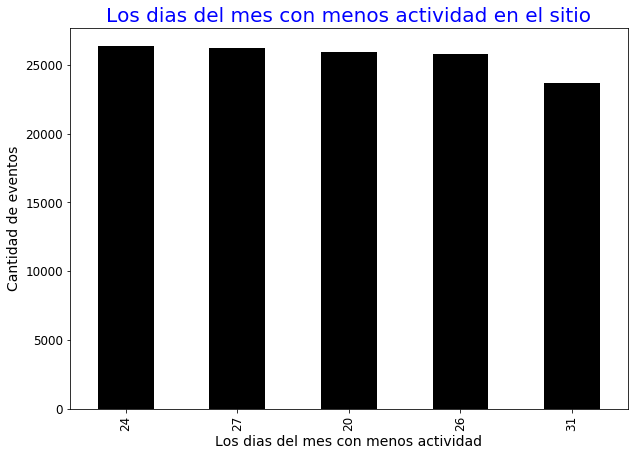

In [15]:
plot = eventos['timestamp'].dt.day.value_counts().tail(5).plot(kind='bar',figsize=(10,7),color = 'black', fontsize=12)
plot.set_xlabel('Los dias del mes con menos actividad',fontsize=14)
plot.set_ylabel('Cantidad de eventos',fontsize=14)
plot.set_title('Los dias del mes con menos actividad en el sitio', fontsize=20,color = 'blue')
plt.show()

###### Se puede concluir que la página registra menor actividad a fin de mes. Esto podría deberse a que a esa altura del mes la gente suele quedarse sin dinero por lo tanto no le interesa buscar celulares para comprar.

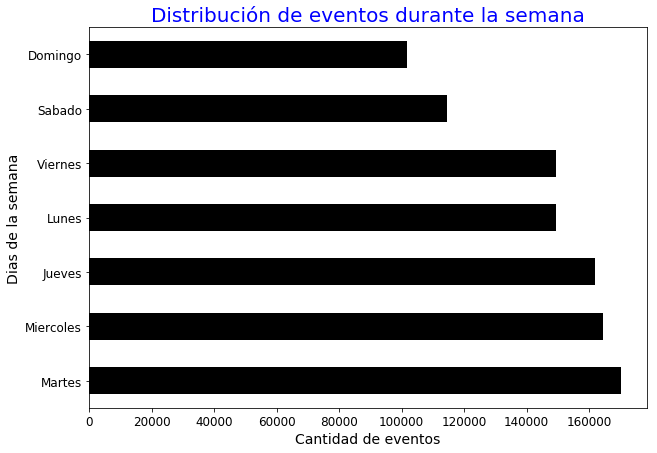

In [16]:
plot = eventos['timestamp'].dt.day_name().value_counts().plot(kind='barh',figsize=(10,7),color = 'black',fontsize=12)
plot.set_ylabel('Dias de la semana',fontsize=14)
plot.set_xlabel('Cantidad de eventos',fontsize=14)
plot.set_title('Distribución de eventos durante la semana', fontsize=20,color = 'blue')

plot.set_yticklabels(['Martes','Miercoles','Jueves','Lunes','Viernes','Sabado','Domingo'])
plt.show()

In [17]:
eventosDeLaSemana = eventos.loc[((eventos['timestamp'].dt.day_name() == 'Monday') 
                                      | (eventos['timestamp'].dt.day_name() == 'Tuesday') 
                                      | (eventos['timestamp'].dt.day_name() == 'Wednesday')
                                      | (eventos['timestamp'].dt.day_name() == 'Thursday')
                                      | (eventos['timestamp'].dt.day_name() == 'Friday')               
                                     ),:]['timestamp'].value_counts().sum()

In [18]:
eventosDelFinDeSemana = eventos.loc[((eventos['timestamp'].dt.day_name() == 'Sunday') 
                                      | (eventos['timestamp'].dt.day_name() == 'Saturday') 
                                     ),:]['timestamp'].value_counts().sum()

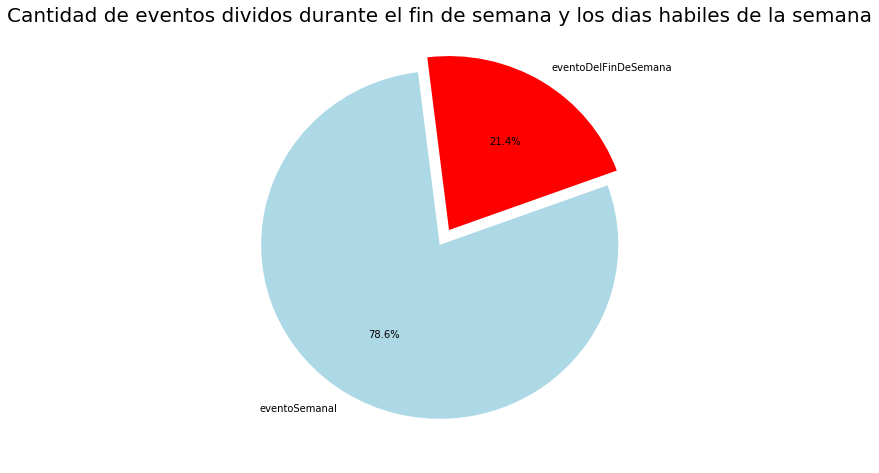

In [19]:
plt.figure(figsize=(8, 8))
sizes = [eventosDelFinDeSemana, eventosDeLaSemana]
nombres = ['eventoDelFinDeSemana', 'eventoSemanal']
plt.title('Cantidad de eventos dividos durante el fin de semana y los dias habiles de la semana', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'lightblue'], explode=(0.1, 0))
plt.show()

###### Se puede observar que se registra mayor actividad los días hábiles.

# Análisis sobre los usuarios con más eventos en el site

### Los 10 usuarios con más eventos

In [20]:
eventos['person'].value_counts().head(10)

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

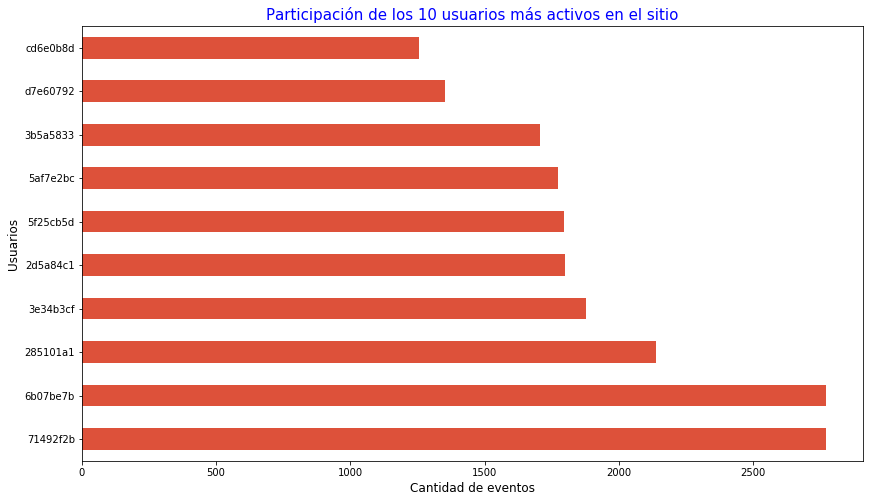

In [21]:
color = cm.inferno_r(np.linspace(.4,.8, 10))
usuariosConMasEventos = eventos.groupby('person').agg({'event':'size'})
plot = usuariosConMasEventos.sort_values('event',ascending = False).head(10).plot(kind = 'barh',legend=False,figsize = (14,8),color = color)
plot.set_title('Participación de los 10 usuarios más activos en el sitio', fontsize=15,color = 'blue')
plot.set_ylabel('Usuarios',fontsize=12)
plot.set_xlabel('Cantidad de eventos',fontsize=12)
plt.show()

###### Tanto el primer como el segundo usuario son demasiados interactivos diferenciados con los demás usuarios.

## ¿Qué hacen los 5 usuarios más activos?

In [22]:
eventosDeLosUsuariosTops = eventos.loc[((eventos['person'] == '71492f2b')
                                        |(eventos['person'] =='6b07be7b')
                                        |(eventos['person'] =='285101a1')
                                        |(eventos['person'] =='3e34b3cf')
                                        |(eventos['person'] =='2d5a84c1')),:]

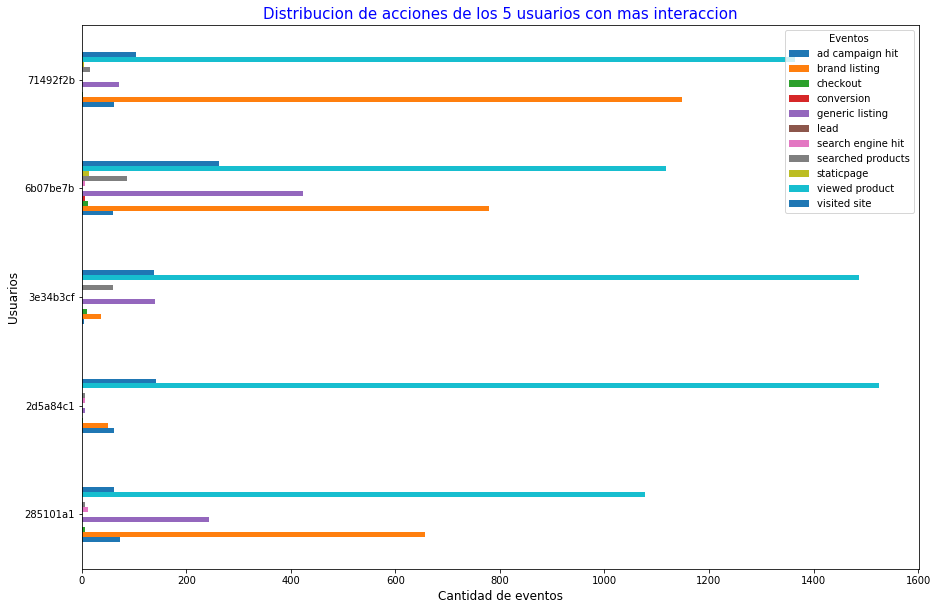

In [23]:
plot = eventosDeLosUsuariosTops.groupby(['person','event']).agg({'event':'size'}).unstack().plot(kind='barh',figsize = (15,10))
plot.set_title('Distribucion de acciones de los 5 usuarios con mas interaccion', fontsize=15,color = 'blue')
plot.set_ylabel('Usuarios',fontsize=12)
plot.set_xlabel('Cantidad de eventos',fontsize=12)
plot.legend(['ad campaign hit','brand listing','checkout','conversion','generic listing','lead','search engine hit','searched products','staticpage','viewed product','visited site'],fontsize=10,title='Eventos')
plt.show()

###### Se ve con claridad que los usuarios con más interacción se la pasan viendo productos, y en algunos de los usuarios, hay una gran cantidad visitas de algún listado específico de alguna marca viendo conjuntos de productos.

### Y cual es la relación compra/vista de celulares?

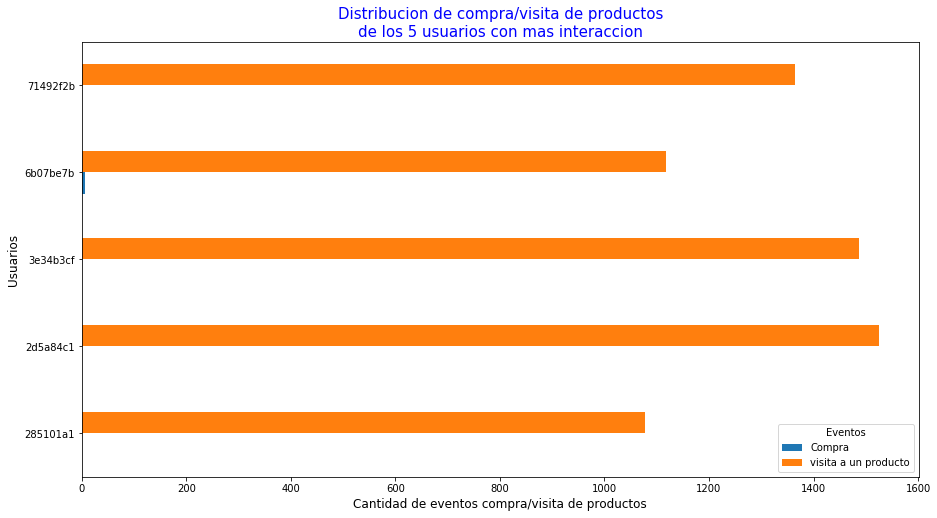

In [24]:
usuariosQueCompran = eventosDeLosUsuariosTops.loc[(eventosDeLosUsuariosTops['event'] == 'conversion') | (eventosDeLosUsuariosTops['event'] == 'viewed product'),:]
plot = usuariosQueCompran.groupby(['person','event']).agg({'person':'size'}).unstack(1).plot(kind = 'barh',stacked=False,figsize = (15,8))
plot.set_title('Distribucion de compra/visita de productos\nde los 5 usuarios con mas interaccion', fontsize=15,color = 'blue')
plot.set_xlabel('Cantidad de eventos compra/visita de productos',fontsize=12)
plot.set_ylabel('Usuarios',fontsize=12)
plot.legend(['Compra','visita a un producto'],fontsize=10,title='Eventos')
plt.show()

In [25]:
usuariosQueCompran['event'].value_counts()

viewed product    6571
conversion           7
Name: event, dtype: int64

###### Debe ser que esos 5 usuarios solamente se centran en buscar buenas oportunidades y en caso de encontrarlo, realizan una compra, eso explica la gran cantidad de vistas y la poca compra que realizan los usuarios.

### Y qué miran?

In [26]:
modelosVistosDeLosUsuariosTops = eventosDeLosUsuariosTops.loc[eventosDeLosUsuariosTops['event'] == 'viewed product',:]
modelosVistosDeLosUsuariosTops['model'].value_counts().head(10)

iPhone 5s                      325
Motorola Moto G4 Plus          320
Samsung Galaxy J7 Prime        258
iPhone 7                       239
Samsung Galaxy S7 Edge         221
Samsung Galaxy Note 8          202
Samsung Galaxy S8 Plus         199
iPhone 7 Plus                  163
Samsung Galaxy A5 2017         135
Samsung Galaxy S6 Edge Plus    134
Name: model, dtype: int64

###### Se ve a simple vista que estos usuarios buscan oportunidades sobre modelos de iphone, motorola y samsung.

### Y de qué manera buscan oportunidades?

In [27]:
eventosDeBusquedaDeLosUsuariosTops = eventosDeLosUsuariosTops.groupby(['person','search_term']).agg({'person':'size'})
eventosDeBusquedaDeLosUsuariosTops = eventosDeBusquedaDeLosUsuariosTops.loc[eventosDeBusquedaDeLosUsuariosTops['person'] >= 3,:]
eventosDeBusquedaDeLosUsuariosTops

person
person   search_term              
285101a1 j5 prime                5
3e34b3cf Iphone 5                4
         Iphone 5s               6
         Iphone 6                6
         Samsung galaxy s5       4
         Samsung galaxy s6       8
6b07be7b 32gb                   10
         A5                      3
         A7                      3
         A8                      3
         A9                      5
         J5                      3
         J7                      6
         Lg g4                   3
         On7                     7
         Samsung                 6
71492f2b moto z                  6
         s7                      5

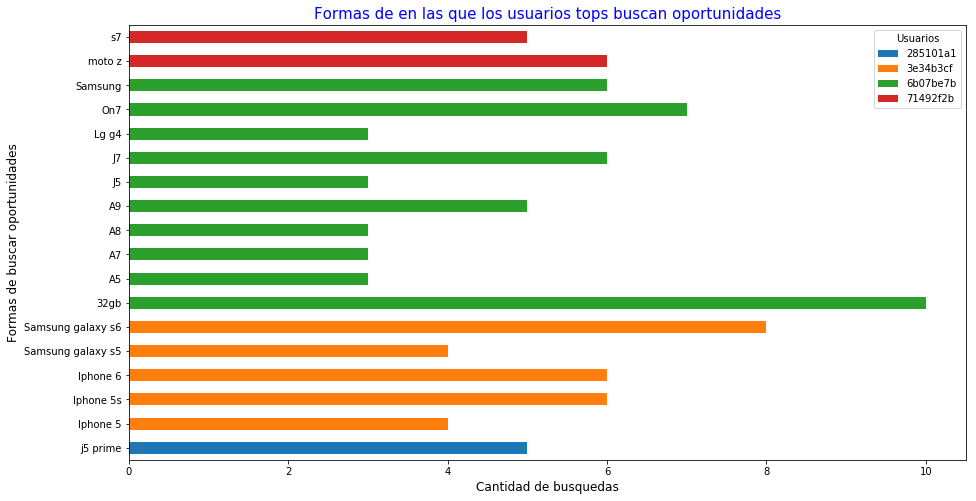

In [28]:
plot = eventosDeBusquedaDeLosUsuariosTops.unstack(0).plot(kind = 'barh',stacked=True,figsize = (15,8))
plot.set_title('Formas de en las que los usuarios tops buscan oportunidades', fontsize=15,color = 'blue')
plot.set_xlabel('Cantidad de busquedas',fontsize=12)
plot.set_ylabel('Formas de buscar oportunidades',fontsize=12)
plot.legend(['285101a1','3e34b3cf','6b07be7b','71492f2b'],fontsize=10,title='Usuarios')
plt.show()

###### Una consideración es el otro usuario top5 que falta es porque realizó muchas búsquedas pero nunca repitió la manera de buscar.

###### Es interante observar como buscan estos usuarios, desde el modelo de una marca(siguen siendo búsquedas sobre modelos de marcas ya destacadas) hasta una búsqueda por capacidad como un requisito mínimo.

### Y en qué momento se mantuvieron activos esos usuarios y cuantos eventos hicieron?

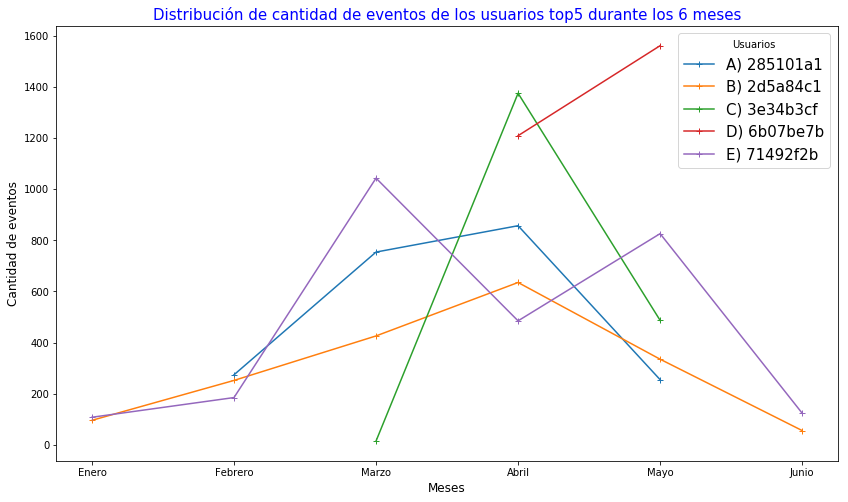

In [29]:
eventosDeLosUsuariosFiltrado = eventosDeLosUsuariosTops.loc[:,['timestamp','event','person']]
eventosDeLosUsuariosFiltrado['monthOfEvent'] = eventosDeLosUsuariosFiltrado['timestamp'].dt.month
plot = eventosDeLosUsuariosFiltrado.groupby(['monthOfEvent','person']).agg({'person':'size'}).unstack(1).plot(kind='line',style='+-',figsize=(14,8))
plot.set_title('Distribución de cantidad de eventos de los usuarios top5 durante los 6 meses', fontsize=15,color = 'blue')
plot.set_xlabel('Meses',fontsize=12)
plot.set_ylabel('Cantidad de eventos',fontsize=12)
plot.legend(['A) 285101a1','B) 2d5a84c1','C) 3e34b3cf','D) 6b07be7b','E) 71492f2b'],fontsize=15,title='Usuarios')
plot.set_xticklabels(['','Enero','Febrero','Marzo','Abril','Mayo','Junio'])
plt.show()

###### Puede apreciarce que solo dos usuarios (B y E) fueron constantes en el sitio durante los 6 meses, por su parte los otros usuarios sólo participaron en algunos meses, por ejemplo, el usuario D solo participó durante dos meses (esa actividad se refleja en la linea roja).

### Y qué es lo que hace el usuario top del site?

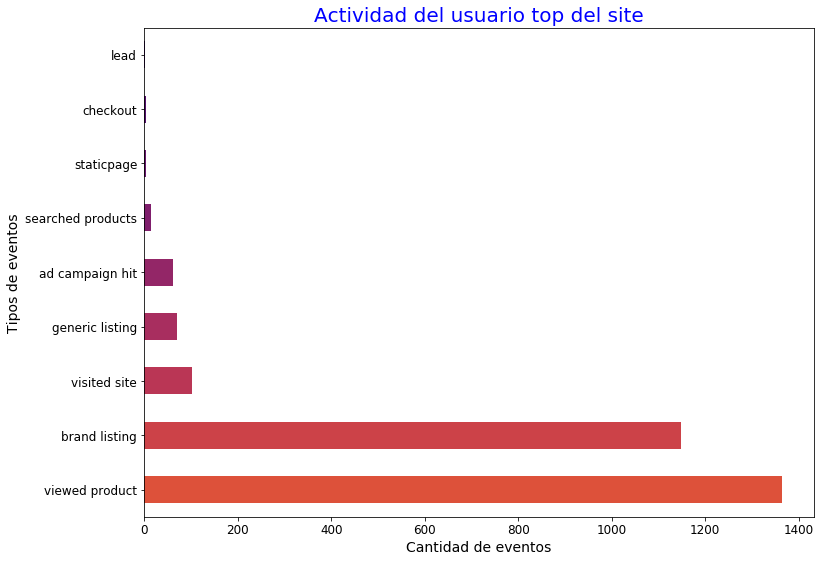

In [30]:
color = cm.inferno_r(np.linspace(.4,.8, 9))
usuarioTop = eventos.loc[(eventos['person'] == '71492f2b'),:]
plot = usuarioTop['event'].value_counts().plot(kind='barh',figsize = (12,9),color = color, fontsize=12)
plot.set_title('Actividad del usuario top del site', fontsize=20,color = 'blue')
plot.set_xlabel('Cantidad de eventos',fontsize=14)
plot.set_ylabel('Tipos de eventos',fontsize=14)
plt.show()

###### Se puede observar lo explicado anteriormente, el usuario top solamente mira productos o busca productos de alguna determinada marca.

###### La inexistencia de conversion es debido a que en los 6 meses jamás realizó una compra.

### Y cómo se comporta durante el mes?

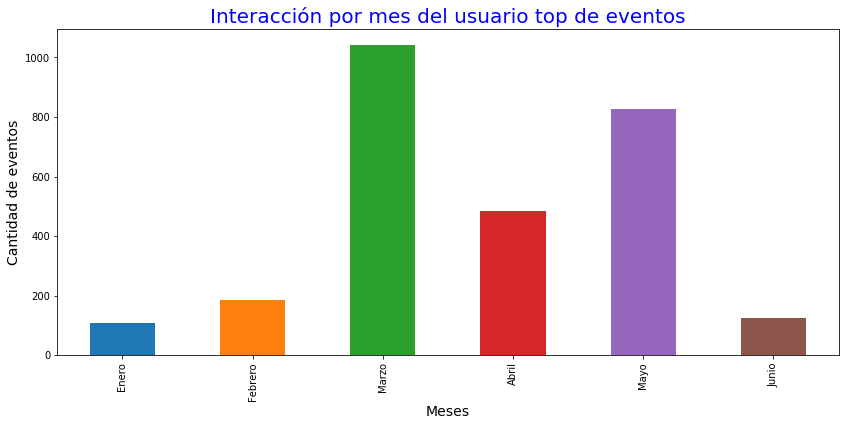

In [31]:
plot = usuarioTop['timestamp'].dt.month.value_counts().sort_index().plot(kind= 'bar',figsize = (14,6))
plot.set_title('Interacción por mes del usuario top de eventos', fontsize=20,color = 'blue')
plot.set_xlabel('Meses',fontsize=14)
plot.set_ylabel('Cantidad de eventos',fontsize=14)
plot.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio'])
plt.show()

###### El usuario realizó más eventos sobre el sitio en el mes de Marzo, casualmente o no, coincide con el mes de más ventas del sitio explicado en otra notebook.

### Y cuál es su rango horario de más actividad?

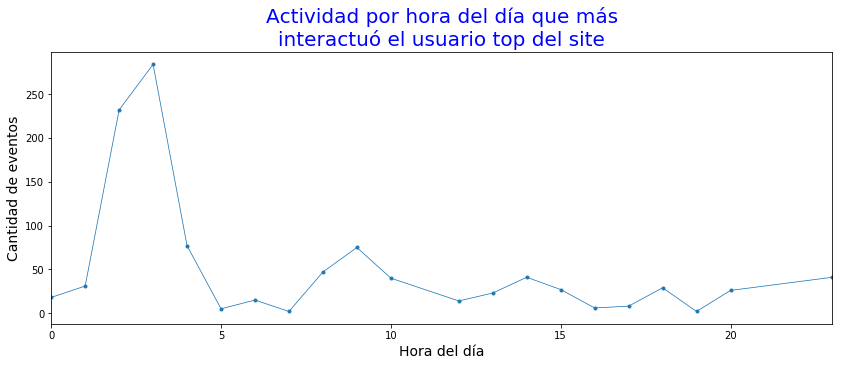

In [32]:
usuarioTop = usuarioTop.loc[usuarioTop['timestamp'].dt.month == 3] ## Es el mes de más actividad del usuarioTop
plot = usuarioTop['timestamp'].dt.hour.value_counts().sort_index(ascending = True).plot(kind = 'line',style='.-',lw=0.75,figsize = (14,5))
plot.set_xlabel('Hora del día',fontsize=14)
plot.set_ylabel('Cantidad de eventos',fontsize=14)
plot.set_title('Actividad por hora del día que más\ninteractuó el usuario top del site', fontsize=20,color = 'blue')
plot.set_xlim([0,23])
plt.show()

###### El gráfico es elocuente, el usuario registra muchísima actividad en el rango de 0 a 5 horas de la madrugada, llegando a un pico de interacción a las 3 de la madrugada.

### A continuación se analizará que hace en su mes más activo.

In [33]:
usuarioTop['diaDelMes'] = usuarioTop['timestamp'].dt.day
usuarioTop = usuarioTop.loc[:,['event','diaDelMes']]
plotNuevo = usuarioTop.groupby(['event','diaDelMes']).agg(np.size).reset_index()

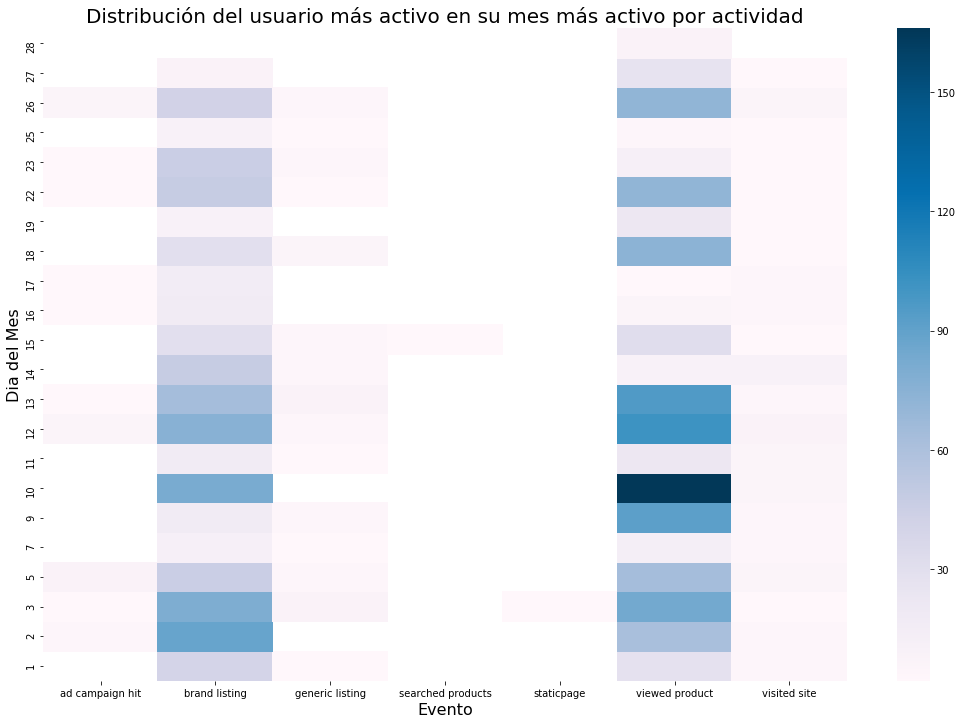

In [34]:
pivoted = pd.pivot_table(plotNuevo,values=0,columns='event', \
               index='diaDelMes')
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
g = sns.heatmap(pivoted,cmap='PuBu');
g.set_title('Distribución del usuario más activo en su mes más activo por actividad', fontsize= 20)
g.set_ylabel('Dia del Mes',fontsize=16)
g.set_xlabel('Evento',fontsize=16)
g.invert_yaxis()
plt.show()

###### Cómo se puede observar, durante el día 10 del mes de Marzo el usuario top realiza muchísimas vistas de productos y visita algunos listados específicos de alguna marca viendo un conjunto de productos.
###### Siguiendo la densidad de eventos, se puede observar que el usuario se la pasa viendo productos.

###### Algo a destacar durante el mes de Marzo, el usuario top el día 29, 30, 4, 6 y 24 no realiza ningún tipo de interacción en el sitio (esa es la razón por la cual no aparece en la escala del día del mes). 

# Análisis de los usuarios de Brasil

## Cantidad de usuarios por país

In [35]:
usuarios = eventos.drop_duplicates(subset="person",keep="first",inplace=False)
usuarios = usuarios.loc[usuarios["country"] != "Unknown"]
usuarios = usuarios.loc[:,["person", "city", "region", "country"]]
usuarios["country"].value_counts()

Brazil            11008
United States       132
Argentina            16
Mozambique            6
Canada                5
France                5
Bangladesh            4
Morocco               2
Portugal              2
Netherlands           2
United Kingdom        2
Italy                 1
Germany               1
Saudi Arabia          1
Philippines           1
Belize                1
Israel                1
Turkey                1
China                 1
Sri Lanka             1
Cape Verde            1
French Guiana         1
Colombia              1
Uruguay               1
Russia                1
Angola                1
India                 1
South Africa          1
Venezuela             1
Ireland               1
Name: country, dtype: int64

###### La cantidad de usuarios provenientes de Brasil es significativamente mayor a la de provenientes de otros paises, por lo que se analizará cómo se distribuyen los primeros a lo largo y a lo ancho del territorio brasilero.

### Distribución por región de los usuarios brasileros (cada 1 millon de habitantes)

In [36]:
usuariosDeBrasil = usuarios.loc[eventos["country"]=="Brazil"]
usuariosDeBrasil = usuariosDeBrasil.loc[:,["person","region"]]
usuariosDeBrasil = usuariosDeBrasil.loc[usuariosDeBrasil["region"] != "Unknown"]
usuariosDeBrasil = usuariosDeBrasil.groupby("region").agg(np.size)
usuariosDeBrasil = usuariosDeBrasil.reset_index()
usuariosDeBrasil.columns = ["Region", "Cantidad de usuarios"]
usuariosDeBrasil["Region"] = ["Acre", "Alagoas", "Amap", "Amazonas", "Bahia", "Cear", "Esprito Santo", "DF", "Gois", "Maranho", "Mato Grosso", "Mato Grosso do Sul", "Minas Gerais", "Par", "Paran", "Paraba", "Pernambuco", "Piau", "Rio Grande do Norte", "Rio Grande do Sul", "Rio de Janeiro", "Rondnia", "Roraima", "Santa Catarina", "So Paulo", "Sergipe", "Tocantins"]
habitantesPorEstado = pd.read_csv("estados_brasil_habitantes.csv")
usuariosDeBrasil["Cantidad de habitantes (en millones)"] = habitantesPorEstado["Poblacion"]
usuariosDeBrasil["Usuarios por millon de habitantes"] = usuariosDeBrasil["Cantidad de usuarios"] / usuariosDeBrasil["Cantidad de habitantes (en millones)"]
usuariosDeBrasil.sort_values("Usuarios por millon de habitantes", ascending=False)

,Region,Cantidad de usuarios,Cantidad de habitantes (en millones),Usuarios por millon de habitantes
24,So Paulo,3190,44.00,72.500000
7,DF,198,3.03,65.346535
20,Rio de Janeiro,969,16.70,58.023952
4,Bahia,732,15.34,47.718383
12,Minas Gerais,976,21.20,46.037736
18,Rio Grande do Norte,147,3.40,43.235294
6,Esprito Santo,168,3.90,43.076923
5,Cear,358,8.84,40.497738
16,Pernambuco,382,9.50,40.210526
26,Tocantins,58,1.50,38.666667


### Mapa coroplético según región

In [37]:
mapa = folium.Map(location=[-30, -40], zoom_start=3)

mapa.choropleth(
    geo_data=open("brasil_estados.geojson").read(),
    name="choropleth",
    data=usuariosDeBrasil,
    columns=["Region","Usuarios por millon de habitantes"],
    key_on="feature.properties.nome_uf",
    #threshold_scale=[3, 50, 100, 400, 1000, 3000],
    fill_color="YlOrBr",
    fill_opacity=0.9,
    line_opacity=0.5,
    legend_name="Usuarios por millon de habitantes"
)


folium.LayerControl().add_to(mapa)
mapa

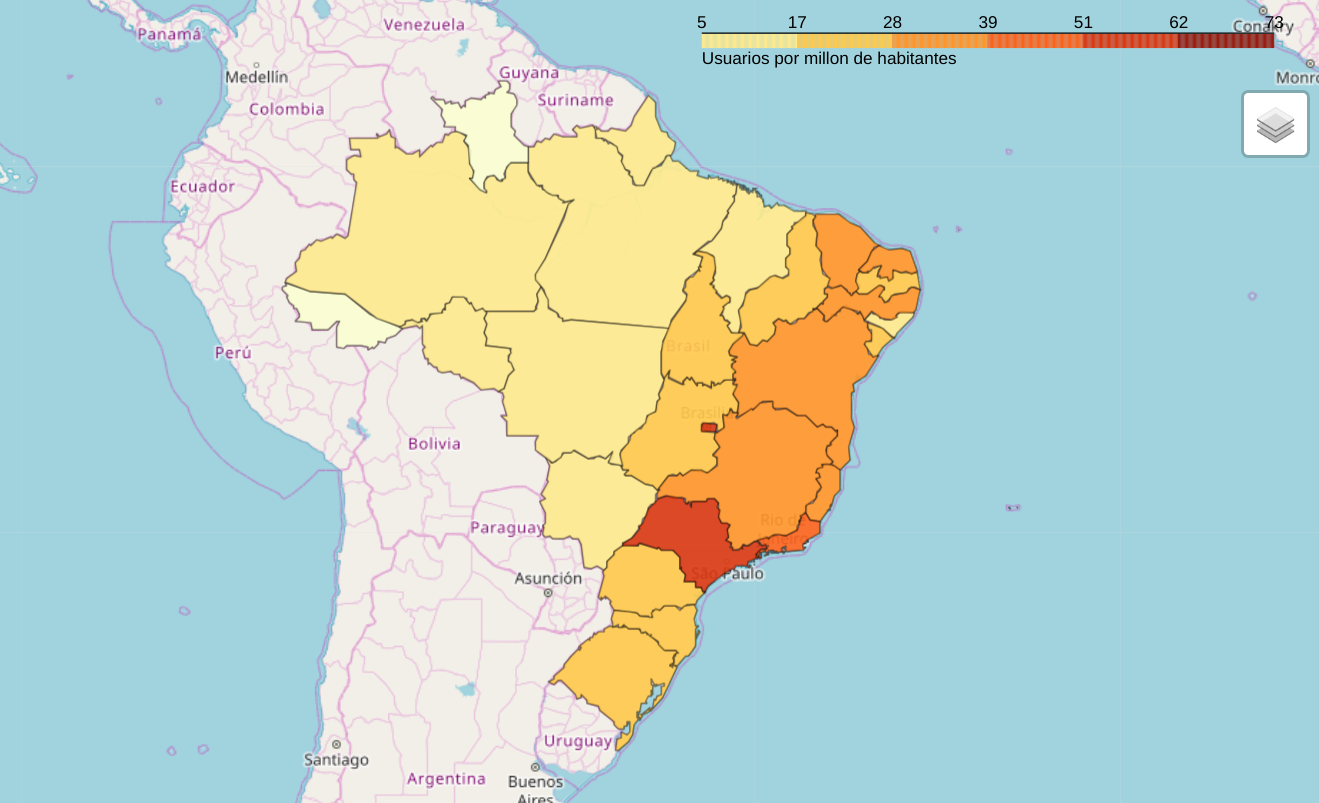

###### Se puede concluir que Trocafone tiende a tener más usuarios (por millón de habitantes) en los lugares más poblados de Brasil, por ejemplo en los estados de Sao Paulo, Rio de Janeiro, Bahia y Minas Gerais. Pero ocurre también que el segundo estado con más usuarios (por millón de habitantes) es el Distrito Federal, lo cual puede deberse a que es una ciudad desarollada tecnológicamente ya que es la capital brasilera.

# Eventos importantes por semana y horario

### Cómo se distribuyen las vistas de productos en el sitio por día y hora de la semana

In [38]:
eventosDeVistaDeProductos = eventos.loc[eventos['event'] == 'viewed product']
eventosDeVistaDeProductos = eventosDeVistaDeProductos.copy()  # Se usa para evitar un cartel de advertencia
eventosDeVistaDeProductos['dayOfWeek'] = eventosDeVistaDeProductos['timestamp'].dt.day_name()
eventosDeVistaDeProductos['dayOfWeek'] = pd.Categorical(eventosDeVistaDeProductos['dayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
eventosDeVistaDeProductos['hour'] = eventosDeVistaDeProductos['timestamp'].dt.hour

In [39]:
eventDeVistaDeProductosPorDiaDeSemanaYHora = eventosDeVistaDeProductos.loc[:,['hour','dayOfWeek']]
eventDeVistaDeProductosPorDiaDeSemanaYHora = eventDeVistaDeProductosPorDiaDeSemanaYHora.groupby(['dayOfWeek','hour']).agg(np.size).reset_index()
eventDeVistaDeProductosPorDiaDeSemanaYHora = eventDeVistaDeProductosPorDiaDeSemanaYHora.sort_values('dayOfWeek')

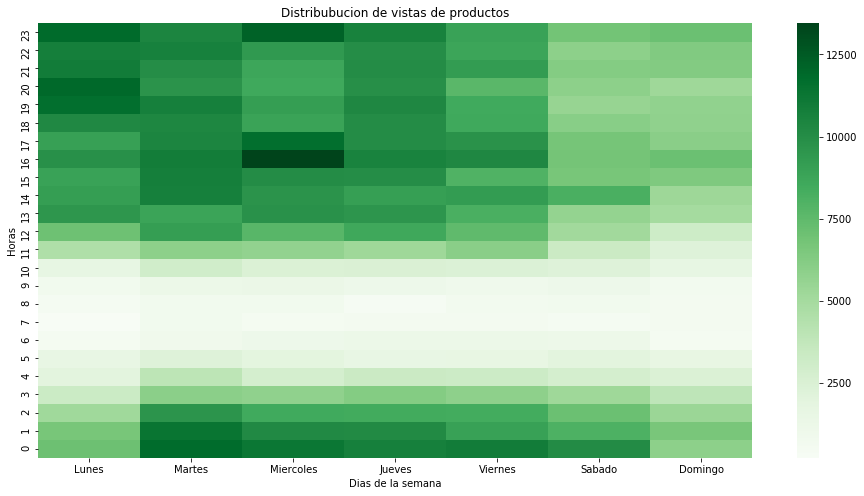

In [40]:
pivoted = pd.pivot_table(eventDeVistaDeProductosPorDiaDeSemanaYHora,values=0,columns='dayOfWeek', \
               index='hour')
fig, ax = plt.subplots(figsize=(16,8))  # Sample figsize in inches
g = sns.heatmap(pivoted,cmap='Greens');
g.set_title("Distribubucion de vistas de productos")
g.set_xlabel('Dias de la semana')
g.set_ylabel('Horas')
g.set_xticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
g.invert_yaxis()

plt.show()

###### Se puede visualizar que entre los rangos de horario que corresponde al intervalo de las 4 y las 10 (horas) hay muy pocas observaciones de vistas de productos, como así también los fin de semanas.

### Cómo se distribuyen las conversiones y los checkouts en el sitio por día y hora de la semana

In [41]:
eventoDeConversionesYChekouts = eventos.loc[(eventos['event'] == 'checkout') | (eventos['event'] == 'conversion')]
eventoDeConversionesYChekouts = eventoDeConversionesYChekouts.copy()  # Se usa para evitar un cartel de advertencia
eventoDeConversionesYChekouts['dayOfWeek'] = eventoDeConversionesYChekouts['timestamp'].dt.day_name()
eventoDeConversionesYChekouts['dayOfWeek'] = pd.Categorical(eventoDeConversionesYChekouts['dayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
eventoDeConversionesYChekouts['hour'] = eventoDeConversionesYChekouts['timestamp'].dt.hour

In [42]:
eventoDeConversionesYCheckoutsPorDiaYHorario = eventoDeConversionesYChekouts.loc[:,['hour','dayOfWeek']]
eventoDeConversionesYCheckoutsPorDiaYHorario = eventoDeConversionesYCheckoutsPorDiaYHorario.groupby(['dayOfWeek','hour']).agg(np.size).reset_index()
eventoDeConversionesYCheckoutsPorDiaYHorario = eventoDeConversionesYCheckoutsPorDiaYHorario.sort_values('dayOfWeek')

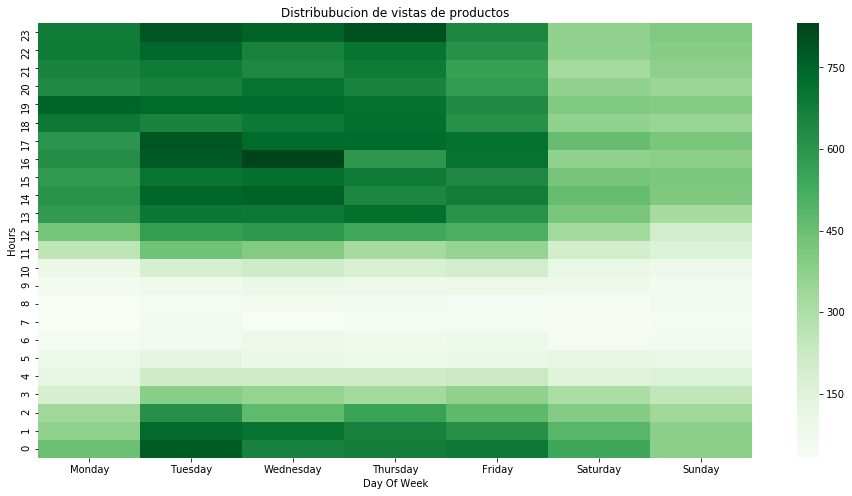

In [43]:
pivoted = pd.pivot_table(eventoDeConversionesYCheckoutsPorDiaYHorario,values=0,columns='dayOfWeek', \
               index='hour')
fig, ax = plt.subplots(figsize=(16,8))  # Sample figsize in inches
g = sns.heatmap(pivoted,cmap='Greens');
g.set_title("Distribubucion de vistas de productos")
g.set_xlabel('Day Of Week')
g.set_ylabel('Hours')
g.invert_yaxis()

plt.show()

###### Como conclusion de ambas visualizaciones es que nuestros usuarios, ya sea comprando o haciendo alguna visita de algún producto (modelo, marca o alguna característica en especial) tienen un rango de horario predeterminado que no contempla en su mayoría los horarios de entre las 4 hasta las 10.

# Análisis sobre la ventas de teléfonos

In [44]:
telefonosComprados = eventos.loc[(eventos['event'] == 'conversion'),:]
telefonosComprados = telefonosComprados.loc[:,['timestamp','person','model','condition','storage','color']]
telefonosComprados.head(5)

,timestamp,person,model,condition,storage,color
220,2018-03-20 17:46:12,00204059,Motorola Moto X2,Muito Bom,32GB,Couro Vintage
2282,2018-04-26 22:28:53,00c13dee,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco
2547,2018-06-10 14:37:50,00fdbb4b,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco
4245,2018-03-16 13:50:25,0146a9df,iPhone 5s,Bom,32GB,Cinza espacial
6985,2018-02-09 22:07:07,01db2fe6,Samsung Galaxy J5,Bom,16GB,Preto


### Análisis sobre los usuarios que más compras realizaron 

In [45]:
telefonosComprados['person'].value_counts().head(10)

252adec6    15
4200bdee    12
a0d4baef    11
ba325a6b    10
a96e304b     8
d12fbe38     8
f646efa2     8
a925072a     7
baa40260     7
19b38ba2     7
Name: person, dtype: int64

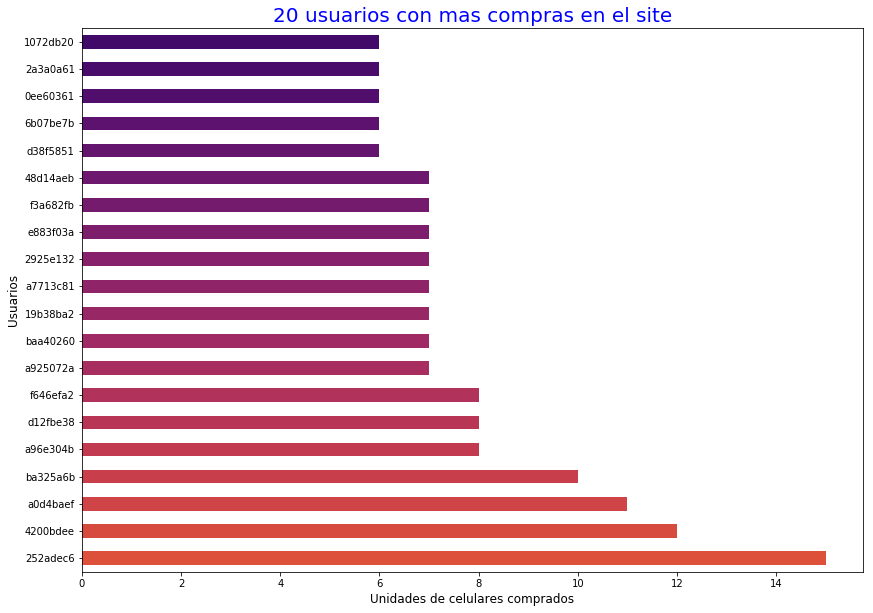

In [46]:
color = cm.inferno_r(np.linspace(.4,.8, 20))
plot = telefonosComprados['person'].value_counts().head(20).plot(kind='barh',figsize=(14,10),color = color)
plot.set_xlabel('Unidades de celulares comprados',fontsize=12)
plot.set_ylabel('Usuarios',fontsize=12)
plot.set_title('20 usuarios con mas compras en el site', fontsize=20,color = 'blue')
plt.show()

###### Claramente se ve que hay un usuario que registra el top compras de celulares,  intuimos que se debe ser algún tipo de comerciante por la cantidad de demanda que hace al site.

## Análisis sobre algunas caracteristicas de los celulares vendidos

### Estado de los celulares vendidos

In [47]:
telefonosComprados['condition'].value_counts()

Bom                   538
Muito Bom             352
Excelente             258
Bom - Sem Touch ID     22
Novo                    2
Name: condition, dtype: int64

In [48]:
#Se debe arreglar el tema de los estados 'Bom - Sem Touch ID' por 'Bom'
def applyFunc(s):
    if s == 'Bom - Sem Touch ID':
        return 'Bom'
    else:
        return s

In [49]:
telefonosComprados['condition'] = telefonosComprados['condition'].map( applyFunc )

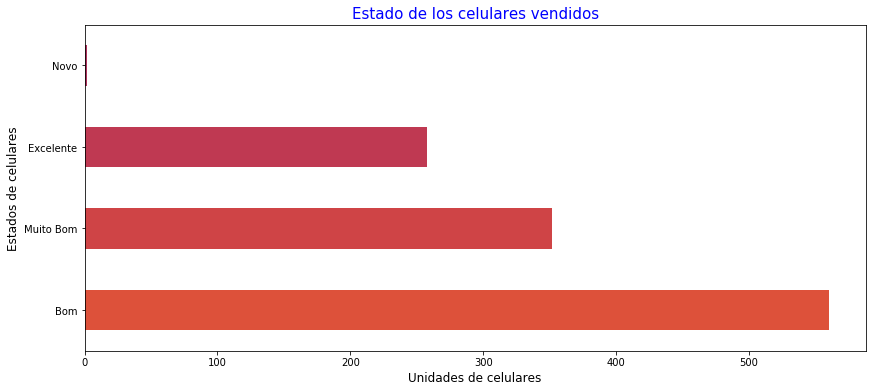

In [50]:
color = cm.inferno_r(np.linspace(.4,.8, 10))
plot = telefonosComprados['condition'].value_counts().plot(kind='barh',figsize=(14,6),color = color)
plot.set_ylabel('Estados de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Estado de los celulares vendidos', fontsize=15,color = 'blue')
plt.show()

###### En este caso se nota que la mayoría de los celulares se encuentran en buen estado, y por lo visto, en el site hay muy pocos celulares nuevos comparado con los demás estados.

###### Una conclusión es que los usuarios que compran en el sitio no necesariamente buscan el estado optimo en un celular, se conforman con un celular en buen estado. 

### Capacidad de los celulares vendidos

In [51]:
telefonosComprados['storage'].value_counts()

16GB     552
32GB     265
8GB      205
64GB     102
128GB     27
4GB       17
512MB      3
256GB      1
Name: storage, dtype: int64

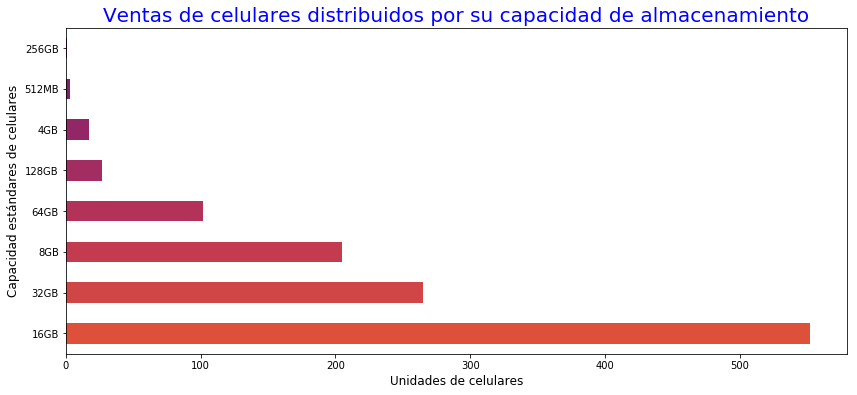

In [52]:
color = cm.inferno_r(np.linspace(.4,.8, 11))
plot = telefonosComprados['storage'].value_counts().plot(kind='barh',figsize=(14,6),color = color)
plot.set_ylabel('Capacidad estándares de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidos por su capacidad de almacenamiento', fontsize=20,color = 'blue')
plt.show()

###### En un primer vistazo se ve que la mayor parte de los celulares vendidos no contemplan el hecho de tener poca capacidad de almacenamiento, más bien intentan de obtener una capacidad dentro del rango de 16,31 y 8 GB.

### Colores de los celulares vendidos

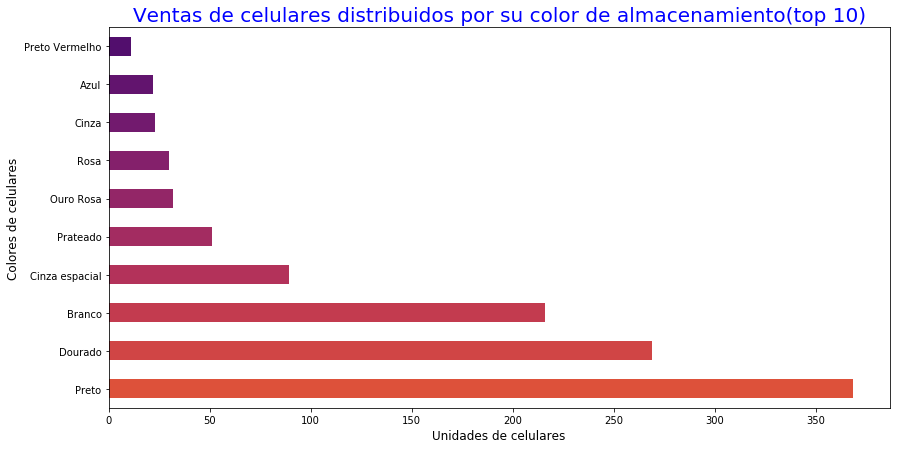

In [53]:
###### color = cm.inferno_r(np.linspace(.4,.8, 10))
plot = telefonosComprados['color'].value_counts().head(10).plot(kind='barh',figsize=(14,7),color = color)
plot.set_ylabel('Colores de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidos por su color de almacenamiento(top 10)', fontsize=20,color = 'blue')
plt.show()

###### Como era de esperarse, el color negro y blanco dominan las elecciones por los compradores. Por otra parte notamos que los usuarios prefieren el color dorado antes que el blanco  lo cual nos resulta un buen dato de estudio.

### Marcas de celulares vendidos

In [54]:
telefonosComprados['marca'] = telefonosComprados.apply( lambda x: str(x['model']).split()[0], axis = 1)

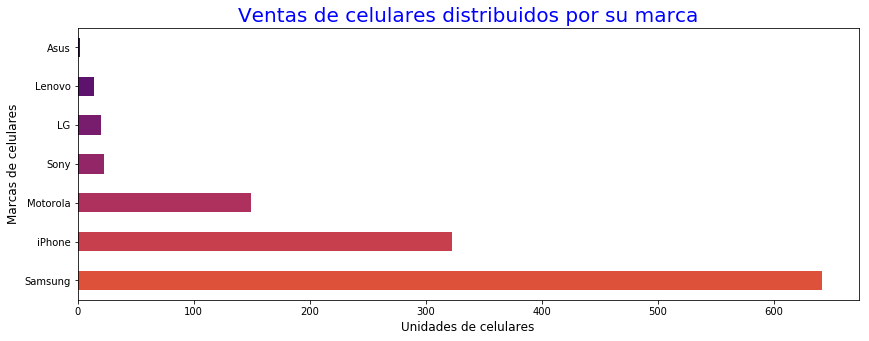

In [55]:
color = cm.inferno_r(np.linspace(.4,.8, 7))
plot = telefonosComprados['marca'].value_counts()[:].head(10).plot(kind='barh',figsize=(14,5),color = color)
plot.set_ylabel('Marcas de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidos por su marca', fontsize=20,color = 'blue')
plt.show()

###### Como lo indica el mercado, esta página no es la excepción, los dos gigantes de la industria de la telefonía como lo son Apple(iPad + iPhone) y Samsung son las marcas que tienen mayor ventas en el site.
###### Motorola se consolida como la mejor tercera opción excluyente a las compañias surcoreanas y las estadounidense.
###### Las demás empresas tienen una menor demanda.

### Modelos de celulares vendidos

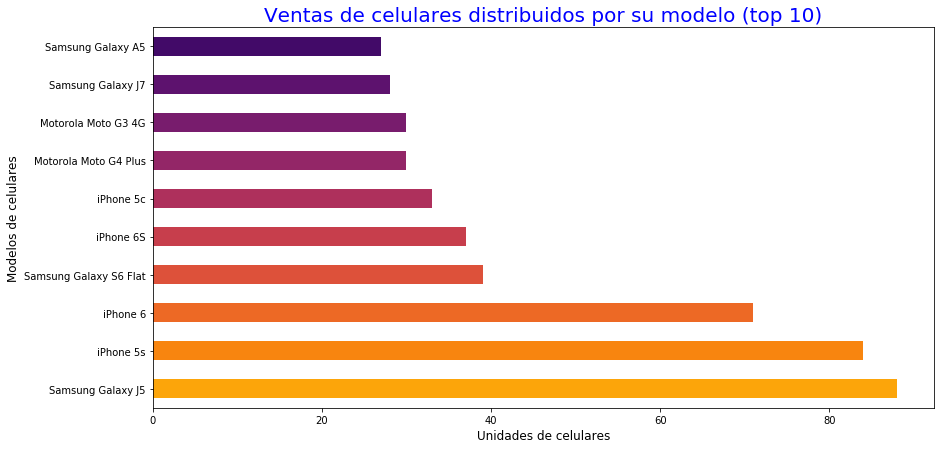

In [56]:
color = cm.inferno_r(np.linspace(.2,.8, 10))
plot = telefonosComprados['model'].value_counts()[:].head(10).plot(kind='barh',figsize=(14,7),color = color)
plot.set_ylabel('Modelos de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidos por su modelo (top 10)', fontsize=20,color = 'blue')
plt.show()

###### Siguiendo con lo anterior, los modelos de celulares vendidos son claramente dominados por Apple y Samsung a tal punto que dentro los 10 modelos más vendidos, no deja que ningún otro modelo de otra marca entre dicho top hasta recientemente la posicion 7 y 8 con presencia de dos modelos Motorola.

## Ventas de celulares dependiendo del año/mes/día de la semana

### Por mes en los primeros 6 meses del año

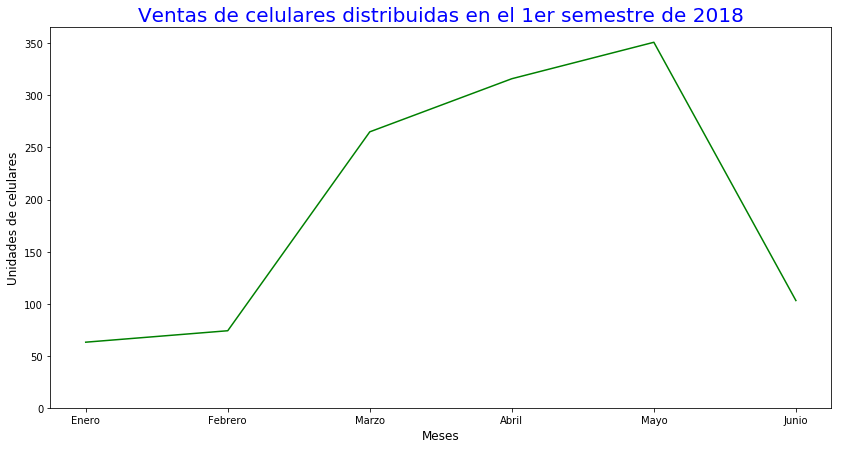

In [57]:
plot = telefonosComprados['timestamp'].dt.month.value_counts().sort_index().plot(kind='line',figsize=(14,7),color = 'green')
plot.set_xlabel('Meses',fontsize=12)
plot.set_ylabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidas en el 1er semestre de 2018', fontsize=20,color = 'blue')
plot.set_xticklabels(['','Enero','Febrero','Marzo','Abril','Mayo','Junio'])
plot.set_ylim(ymin=0)
plt.show()

###### Se ve que hay un crecimiento de ventas muy alto durante el mes de Marzo, Abril y Mayo (generando un pico de ventas en ese mes), que contrasta mucho con los meses anteriores, aunque para el próximo mes de Junio, demuestra una baja en cantidad de unidades vendidas.
###### El crecimiento de Mayo se debe a posiblemente algún tipo de Hot-Sale durante el mes de Mayo, lo que aumentó conciderablemente las ventas de ese mes.

### Por dias durante los primeros 6 meses del año

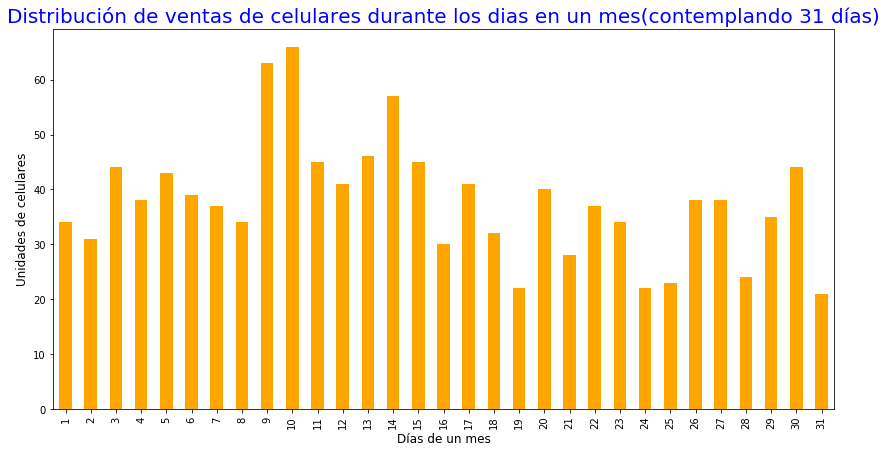

In [58]:
plot = telefonosComprados['timestamp'].dt.day.value_counts().sort_index().plot(kind='bar',figsize=(14,7),color = 'orange')
plot.set_xlabel('Días de un mes',fontsize=12)
plot.set_ylabel('Unidades de celulares',fontsize=12)
plot.set_title('Distribución de ventas de celulares durante los dias en un mes(contemplando 31 días)', fontsize=20,color = 'blue')
plt.show()

###### Se ve que durante los días 9 y 10 de los meses hay una suba considerable en ventas de teléfonos. Este gráfico muestra que los celulares tienen una baja venta en los días 31 pero esto se debe a que en los primeros 6 meses del año hay solamente 2 meses con 31 días.

### Por días distribuidos durante la semana

In [59]:
telefonosComprados ['dayOfWeek'] = telefonosComprados['timestamp'].dt.day_name()
telefonosComprados['dayOfWeek'] = pd.Categorical(telefonosComprados['dayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

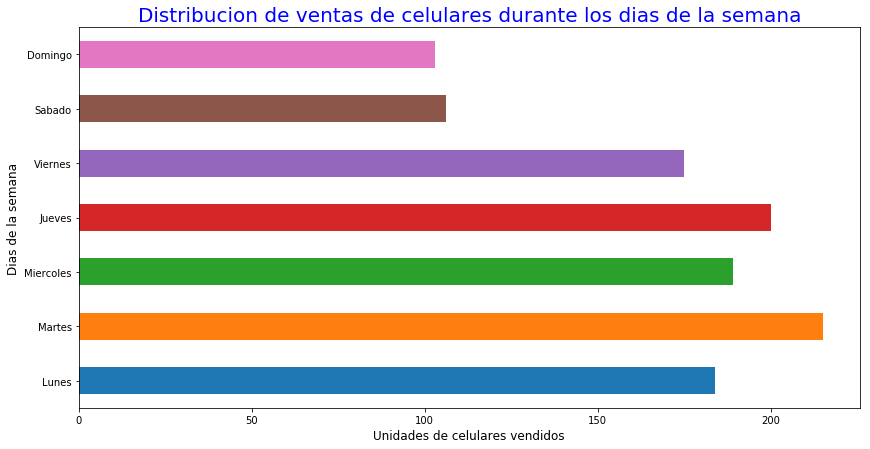

In [60]:
plot = telefonosComprados['dayOfWeek'].value_counts().sort_index().plot(kind='barh',figsize=(14,7))
plot.set_ylabel('Dias de la semana',fontsize=12)
plot.set_xlabel('Unidades de celulares vendidos',fontsize=12)
plot.set_yticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
plot.set_title('Distribucion de ventas de celulares durante los dias de la semana', fontsize=20,color = 'blue')
plt.show()

###### El site trocafone tiene mucha actividad de ventas de celulares durante los días hábiles de la semana a diferencia de los días de fin de semana, siendo el Domingo el día de menor cantidad de ventas.

## Pequeño análisis sobre los dos usuarios con más compras

In [61]:
usuarioConMasCompras = telefonosComprados.loc[telefonosComprados['person'] == '252adec6' ,:]
segundoUsuarioConMasCompras = telefonosComprados.loc[telefonosComprados['person'] == '4200bdee' ,:]

In [62]:
usuarioConMasCompras['model'].value_counts()

Motorola Moto G3 4G         8
Samsung Galaxy A5           3
Motorola Moto G4 Plus       2
Motorola Moto G4 Play       1
Motorola Moto G2 3G Dual    1
Name: model, dtype: int64

###### El usuario con más compras solicita en su mayoría modelos de la marca Motorola con una predilección por el modelo Moto G3 4G.

In [63]:
segundoUsuarioConMasCompras['model'].value_counts()

Samsung Galaxy S6 Flat    8
Samsung Galaxy A5         3
Samsung Galaxy A7 2017    1
Name: model, dtype: int64

###### El segundo usuario con más compras en el site, compra muchos modelos de Samsung pero su prioridad es el Galaxy S6 Flat , marcando una diferencia con el usuario con más ventas.

### Análisis sobre las 3 marcas/modelos con más compras

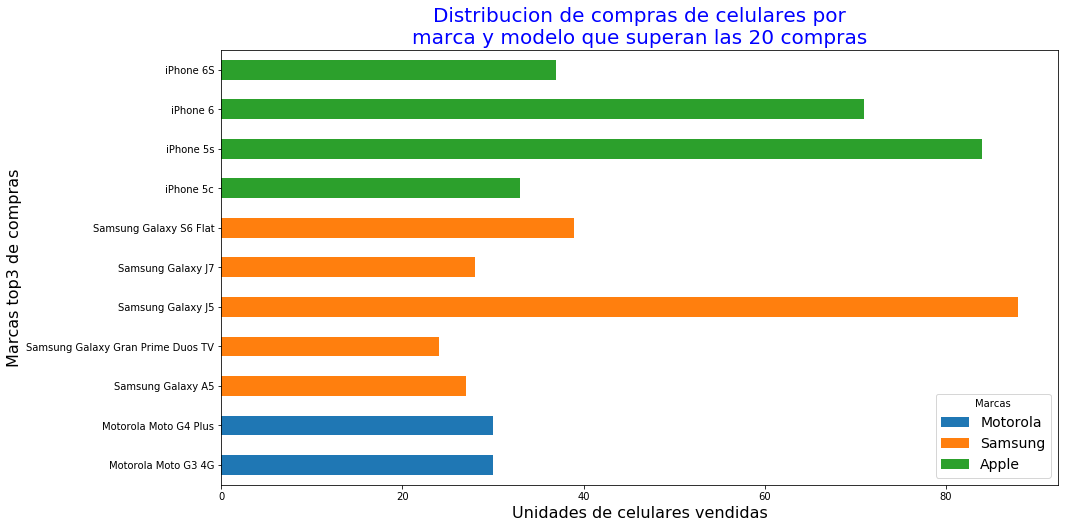

In [64]:
agrupacionPorModeloYMarca = telefonosComprados.groupby(['marca','model']).agg({'person': 'size'})

plot = agrupacionPorModeloYMarca[agrupacionPorModeloYMarca['person'] > 20].unstack(0).plot(kind = 'barh',figsize=(15,8),stacked=True)
plot.set_title('Distribucion de compras de celulares por\nmarca y modelo que superan las 20 compras', fontsize=20,color = 'blue')
plot.set_xlabel('Unidades de celulares vendidas',fontsize=16)
plot.set_ylabel('Marcas top3 de compras',fontsize=16)
plot.legend(['Motorola','Samsung','Apple'],fontsize=14,title='Marcas')
plt.show()

###### Se ve que los unicas marcas que han superado en algún modelo las 20 compras son Motorola(con dos modelos de celulares), Apple (con cuatro modelos) y Samsung (con cinco modelos).

###### A su vez podemos notar la diferencia que existe los modelos más pedidos con respecto a los demás (Galaxy J5, iPhone 5s y iPhone6).

### Observemos el comportamiento del usuario más comprador vs el usuario más activo

Sacamos el usuario mas activo del sitio en otro análisis (análisis sobre los usuarios más participativos).

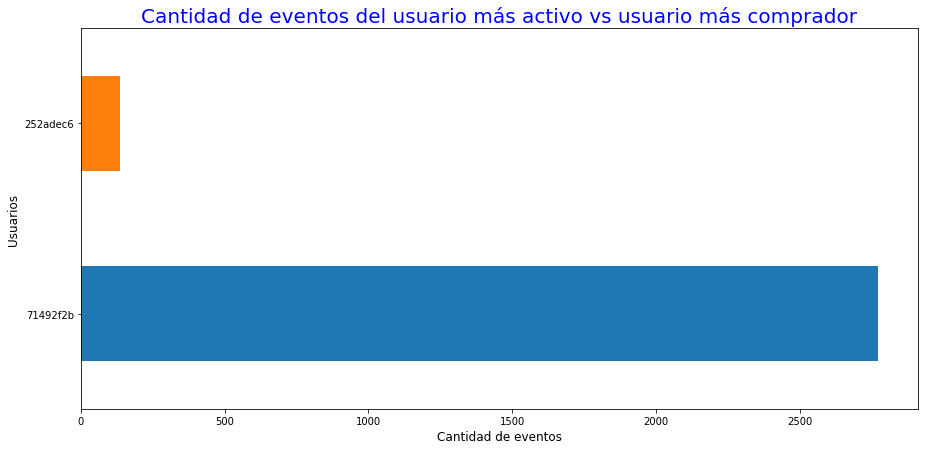

In [65]:
usuarioMasActivo = '71492f2b'
usuarioMasComprador = '252adec6'
usuarioFiltrados = eventos.loc[((eventos['person'] == usuarioMasActivo) | (eventos['person'] == usuarioMasComprador)),:]
plot = usuarioFiltrados['person'].value_counts().plot(kind= 'barh',figsize=(15,7),stacked=False)
plot.set_title('Cantidad de eventos del usuario más activo vs usuario más comprador', fontsize=20,color = 'blue')
plot.set_ylabel('Usuarios',fontsize=12)
plot.set_xlabel('Cantidad de eventos',fontsize=12)
plt.show()

###### Claramente hay grandes diferencia entre las interacciones de los dos usuarios, superando ampliamente el usuario más activo al usuario más comprador.

### Distribución de los eventos de los dos usuarios analizados.

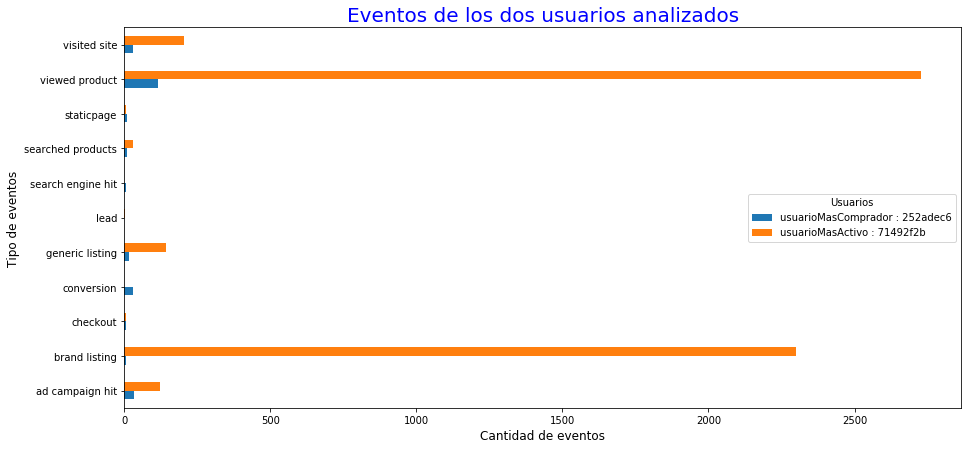

In [66]:
usuariosFiltrados = usuarioFiltrados.loc[:,['person','event']]
plot = usuariosFiltrados.groupby(['person','event']).agg(np.size).unstack(0).plot(kind='barh',figsize=(15,7),stacked=False)
plot.set_title('Eventos de los dos usuarios analizados', fontsize=20,color = 'blue')
plot.set_ylabel('Tipo de eventos',fontsize=12)
plot.set_xlabel('Cantidad de eventos',fontsize=12)
plot.legend(fontsize=15,title='Usuarios')
plot.legend(['usuarioMasComprador : 252adec6','usuarioMasActivo : 71492f2b'],title = 'Usuarios')
plt.show()

###### Se puede ver que el usuario más comprador ve una cierta cantidad de productos y compra en gran porcentaje, en cambio el usuario más activo, solamente ve productos o mira algún listado específico de algunas marcas sin realizar ningun tipo de conversión por lo que sólo hace consultas sobre el mismo.

#### Y en qué meses se distribuyen sus actividades?

In [67]:
usuariosFiltradosConHorarios = eventos.loc[((eventos['person'] == usuarioMasActivo) | (eventos['person'] == usuarioMasComprador))]
usuariosFiltradosConMeses = usuariosFiltradosConHorarios.loc[:,['person','timestamp']]
usuariosFiltradosConMeses['month'] = usuariosFiltradosConMeses['timestamp'].dt.month_name()
usuariosFiltradosConMeses = usuariosFiltradosConMeses.drop('timestamp', 1)

In [68]:
plot = usuariosFiltradosConMeses.groupby(['person','month']).agg(np.size).reset_index()

plot['month'] = pd.Categorical(plot['month'], categories=['January','February','March','April','May','June'], ordered=True)
plot = plot.sort_values('month')

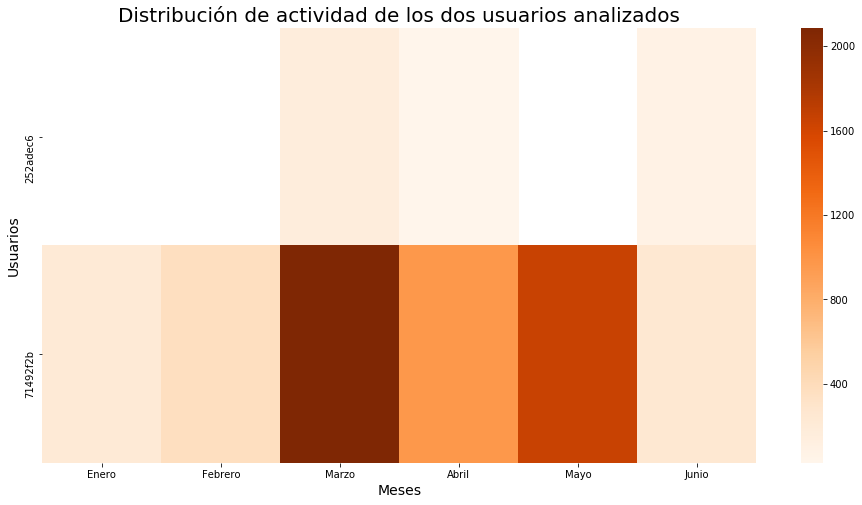

In [69]:
pivoted = pd.pivot_table(plot,values=0,columns='month', \
               index='person')
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
g = sns.heatmap(pivoted,cmap='Oranges');
g.set_title('Distribución de actividad de los dos usuarios analizados', fontsize=20)
g.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio'])
g.set_xlabel('Meses', fontsize=14)
g.set_ylabel('Usuarios', fontsize=14)

plt.show()

###### Por consiguiente, el HeatMaps muestra como el usuario más comprador tiene actividad en solo 3 meses(y muy poca comparada con el otro usuario), mientras que el usuario más activo registra una actividad constante durante los 6 meses,con un gran caudal de eventos en los meses de Marzo, Abril y Mayo.

### Y cómo se distribuyen sus actividades en la semana?

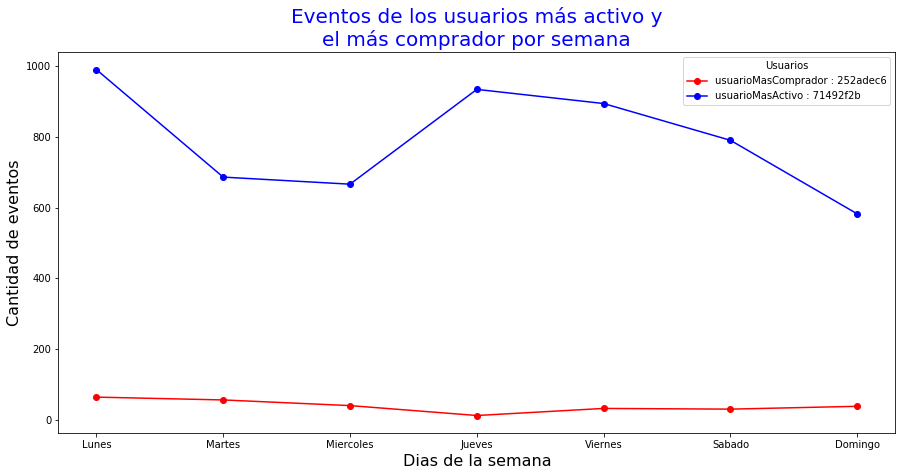

In [70]:
usuariosFiltradosCondias = usuariosFiltradosConHorarios.loc[:,['person','timestamp']]
usuariosFiltradosCondias['dayOfWeek'] = usuariosFiltradosCondias['timestamp'].dt.day_name()
usuariosFiltradosCondias = usuariosFiltradosCondias.drop('timestamp', 1)
usuariosFiltradosCondias['dayOfWeek'] = pd.Categorical(usuariosFiltradosCondias['dayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
usuariosFiltradosCondias = usuariosFiltradosCondias.sort_values('dayOfWeek')
plot = usuariosFiltradosCondias.groupby(['person','dayOfWeek']).agg(np.size).unstack(0).plot(kind = 'line',style=['ro-','bo-'],figsize=(15,7))
plot.set_ylabel('Cantidad de eventos',fontsize=16)
plot.set_xlabel('Dias de la semana',fontsize=16)
plot.set_title('Eventos de los usuarios más activo y\nel más comprador por semana', fontsize=20,color = 'blue')
plot.legend(fontsize=15,title='Usuarios')
plot.legend(['usuarioMasComprador : 252adec6','usuarioMasActivo : 71492f2b'],title = 'Usuarios')
plot.set_xticklabels(['','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado', 'Domingo'])
plt.show()

###### De la visualización se pueden dilucidar que el usuario más comprador del site es constante y con un seguimiento/interacción de bajo nivel.Esto contrasta mucho con el usuario con más interacción en el sitio, que mantiene una gran cantidad de eventos durante toda la semana con picos de interacción en algunos días en particular.


# Análisis sobre cuál campaña de marketing da más rédito

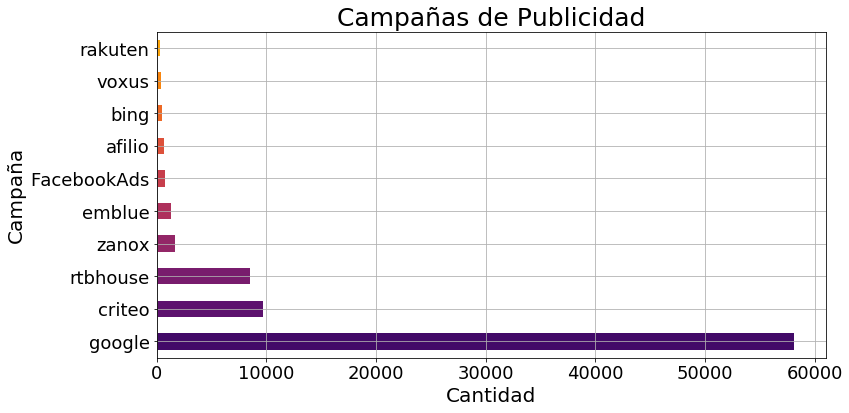

In [71]:
color = cm.inferno_r(np.linspace(.8,.2, 10))
plot = eventos['campaign_source'].value_counts().head(10).plot(kind = 'barh',figsize = (12,6),color = color,grid = True, fontsize=18)

plot.set_xlabel("Cantidad",fontsize=20)
plot.set_ylabel("Campaña",fontsize=20)
plot.set_title("Campañas de Publicidad", fontsize=25,color ="black")
plt.show()


###### Como se ve, claramente google es nuestro principal acceso al site mediante una campaña de marketing.

In [72]:
campañasSinGoogle = eventos['campaign_source'].value_counts()[1:].sum()
campañasGoogle = eventos['campaign_source'].value_counts().head(1).sum()

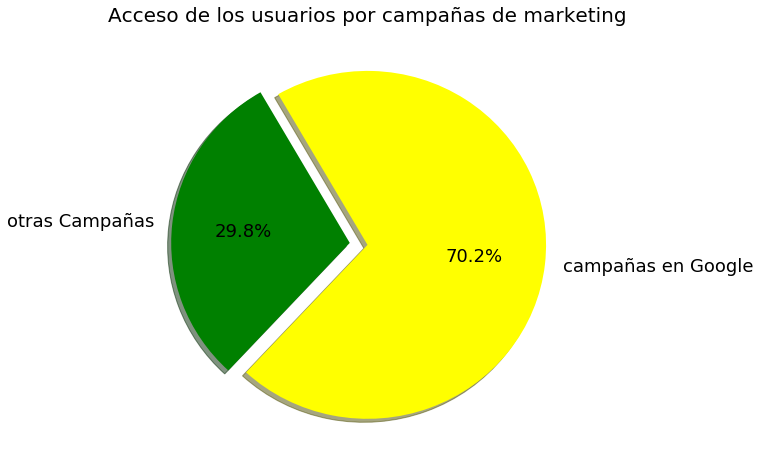

In [73]:
plt.figure(figsize=(8, 8))
sizes = [campañasSinGoogle, campañasGoogle]
nombres = ['otras Campañas', 'campañas en Google']
plt.title('Acceso de los usuarios por campañas de marketing', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=120, colors=['green', 'yellow'], explode=(0.1, 0),shadow = True, textprops={'fontsize': 18})

plt.show()

###### El gráfico de torta muestra que de nuestros accesos de marketing, el 70% es ingresado por campañas de google(tiene sentido ya qué google es el búscador principal de la web) y las demás campañas en conjunto no logran llegar al 30%.

###### Está claro que el sector de marketing debería centrar sus operaciones sobre la plataforma de Google ya que es la de más efectiva (y por mucho).

## Análisis sobre el rendimiento de las campañas de marketing

In [74]:
analisisSobreCampañasDeMKT = eventos.loc[:,['timestamp','person','event','campaign_source']]
analisisSobreCampañasDeMKT = analisisSobreCampañasDeMKT.loc[analisisSobreCampañasDeMKT['campaign_source'] != 'Unknown',:]

personasQueIngresaronPorUnaCampañaDeMkt = analisisSobreCampañasDeMKT.groupby(['person','campaign_source']).agg(np.size)['timestamp'].reset_index()

personTopsQueIngresanPorCampañasDeMkt = set(personasQueIngresaronPorUnaCampañaDeMkt['person'].tolist())
cantidadDePersonTopsQueIngresanPorCampañasDeMkt = len(personTopsQueIngresanPorCampañasDeMkt)

In [75]:
cantidadDePersonTopsQueIngresanPorCampañasDeMktYCompraron = eventos.loc[(eventos['event'] == 'conversion') & eventos['person'].isin(personTopsQueIngresanPorCampañasDeMkt)]['person'].count()

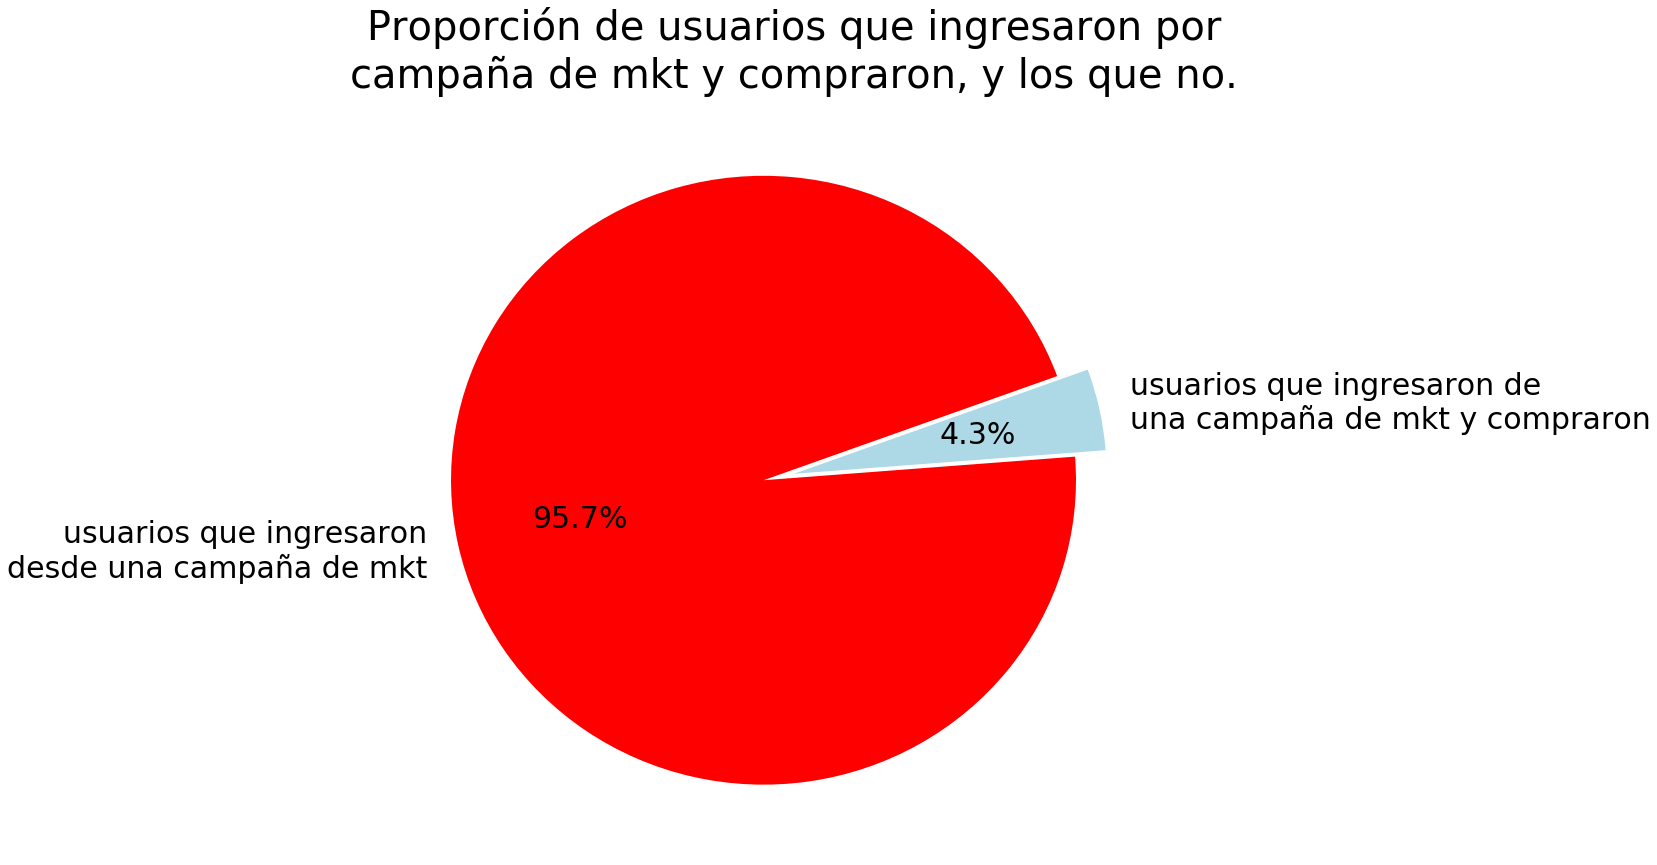

In [76]:
plt.figure(figsize=(14, 14))
sizes = [cantidadDePersonTopsQueIngresanPorCampañasDeMkt, cantidadDePersonTopsQueIngresanPorCampañasDeMktYCompraron]
nombres = ['usuarios que ingresaron\ndesde una campaña de mkt', 'usuarios que ingresaron de\nuna campaña de mkt y compraron']
plt.title('Proporción de usuarios que ingresaron por\ncampaña de mkt y compraron, y los que no.', fontsize=40)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'lightblue'], explode=(0.1, 0), textprops={'fontsize': 30})
plt.show()

###### Como se puede dilucidar, las campañas de marketing tienen muy poca efectividad sobre nuestros usuarios.
###### Solamente apenas un poco más del 4% de nuestros usuarios ingresados desde una campaña de marketing realizan alguna conversion.

# Análisis de los canales de acceso 

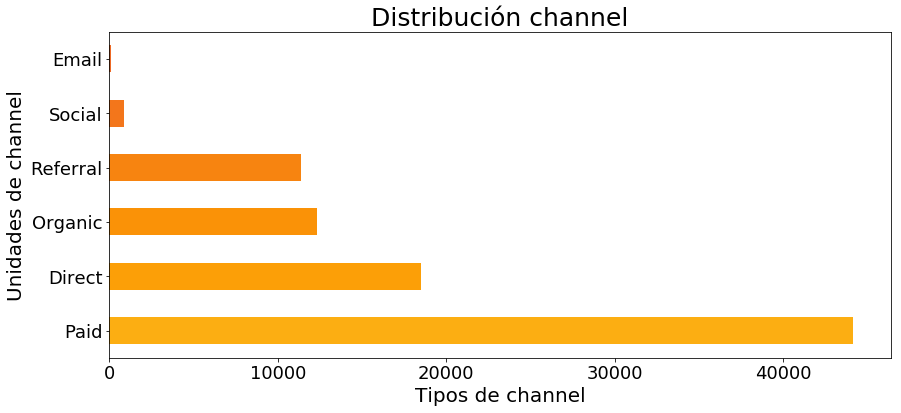

In [77]:
color = cm.inferno_r(np.linspace(.18,.8, 21))

analisisChannel = eventos.loc[:,['timestamp','person','event','channel']]
analisisChannel = analisisChannel.loc[analisisChannel['channel'] != 'Unknown',:]

plot = analisisChannel['channel'].value_counts().plot(kind = 'barh',figsize = (14,6),color=color, fontsize = 18)
plot.set_title('Distribución channel',fontsize = 25)
plot.set_xlabel('Tipos de channel',fontsize =20)
plot.set_ylabel('Unidades de channel',fontsize =20)
plt.show()

###### Claramente se ve que el tipo de canal dominante es el pago.

### Evolución en el tiempo

In [78]:
analisisChannel['month'] = analisisChannel['timestamp'].dt.month

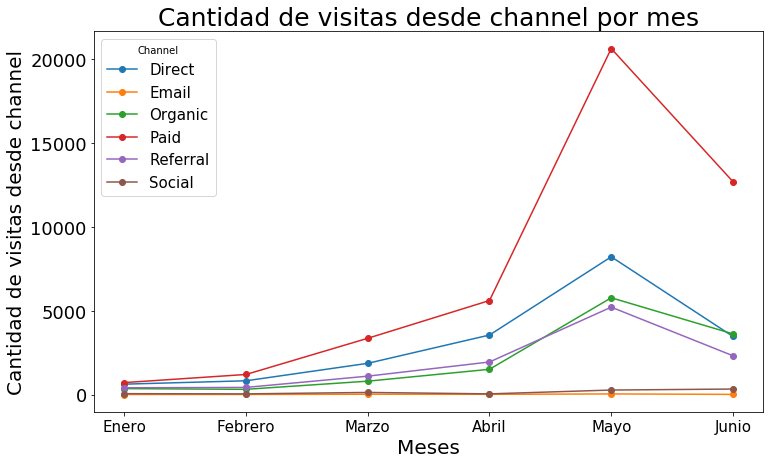

In [79]:
plot = analisisChannel.groupby(['month','channel']).agg(np.size)['event'].unstack(1).plot(kind = 'line',figsize = (12,7),style='-o', fontsize = 18)
plot.set_title('Cantidad de visitas desde channel por mes',fontsize = 25)
plot.legend(fontsize=15,title='Channel')
plot.set_xticklabels(['','Enero','Febrero','Marzo','Abril','Mayo','Junio'], fontsize = 15)
plot.set_ylabel('Cantidad de visitas desde channel',fontsize = 20)
plot.set_xlabel('Meses',fontsize = 20)
plt.show()

###### Es claro que el mes de mayo tiene un pico de cantidades de channel que concuerda con el mes de mayor participación dentro del site (anteriormente analizado).

###### Por su parte, los canales como emails o social tiene prácticamente nula incidencia tanto en cantidad como en distribución durante los 6 meses.

### Channels y usuarios 

In [80]:
grupoCanales = analisisChannel.groupby(['person','channel']).agg(np.size)
grupoCanales = grupoCanales.loc[grupoCanales['event'] > 85]


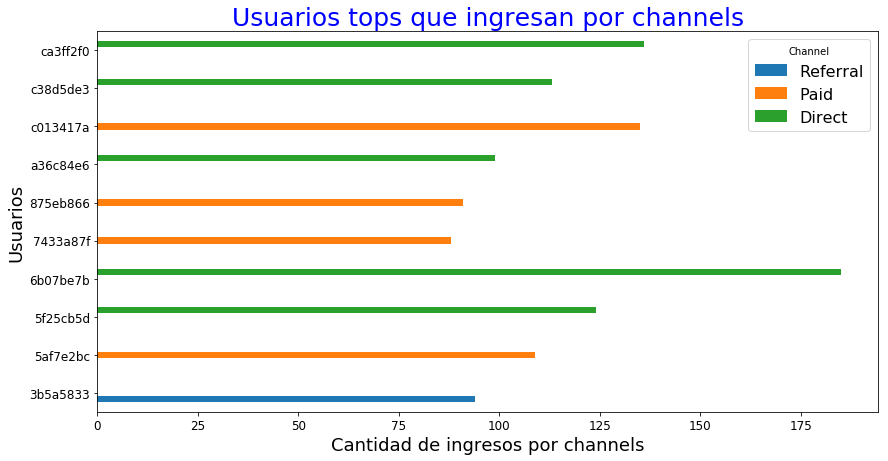

In [81]:
plot = grupoCanales['event'].unstack(1).plot(kind = 'barh',figsize = (14,7),stacked=False, fontsize=12 )

plot.set_title('Usuarios tops que ingresan por channels', fontsize=25,color = 'blue')
plot.set_xlabel('Cantidad de ingresos por channels',fontsize=18)
plot.set_ylabel('Usuarios',fontsize=18)
plot.legend(title = 'Channel',fontsize = 16)
plt.show()

###### Se puede observar que entre los primeros díez usuarios no hay ninguno que utilice dos canales diferentes y superen la cota de 85 veces, por lo cuál se deduce que los usuarios tops ingresan solamente por una manera después de acumular 85 ingresos channels.

###### Otra observación es que el directo y pago dentro de los usuarios top es la preferencia por excelencia.

# Análisis de los dispositivos

In [82]:
dispositivos = eventos.loc[eventos["device_type"] != "Unknown"]
cantDispositivos = dispositivos["device_type"].value_counts().reset_index()
cantDispositivos.columns = ["Tipo de dispositivo", "Cantidad"]
cantDispositivos

,Tipo de dispositivo,Cantidad
0,Smartphone,44239
1,Computer,41790
2,Tablet,1234


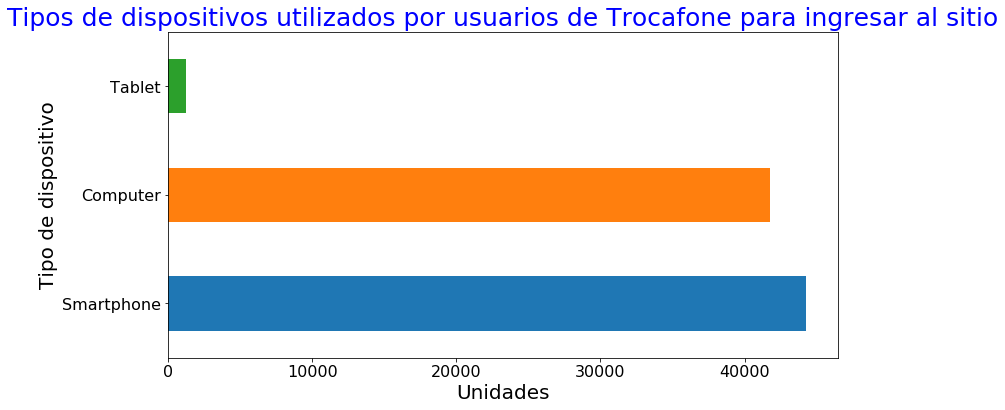

In [83]:
plotSisOp = dispositivos["device_type"].value_counts().plot(kind="barh",figsize=(12,6), fontsize=16)
plotSisOp.set_xlabel("Unidades",fontsize=20)
plotSisOp.set_ylabel("Tipo de dispositivo",fontsize=20)
plotSisOp.set_title("Tipos de dispositivos utilizados por usuarios de Trocafone para ingresar al sitio", fontsize=25,color ="blue")
plt.show()

###### Se observa que la mayoría de los usuarios ingresan desde un Smartphone o desde una computadora, por lo que se analizarán estos dos por separado para saber los SO de cada uno.

## Análisis de los SO (Smartphone)

In [84]:
eventosSO = eventos[["device_type", "operating_system_version"]]
celulares = eventosSO.loc[eventosSO["device_type"]=="Smartphone"]

In [85]:
celulares = celulares.loc[celulares["operating_system_version"] != "Other "]
celulares["Sistema operativo"] = celulares.apply( lambda x: str(x["operating_system_version"]).split()[0], axis = 1)
sisOpCelulares = celulares["Sistema operativo"].value_counts().reset_index()
sisOpCelulares.columns = ['Sistema operativo','cantidad']
sisOpCelulares

,Sistema operativo,cantidad
0,Android,40412
1,iOS,3303
2,Windows,497


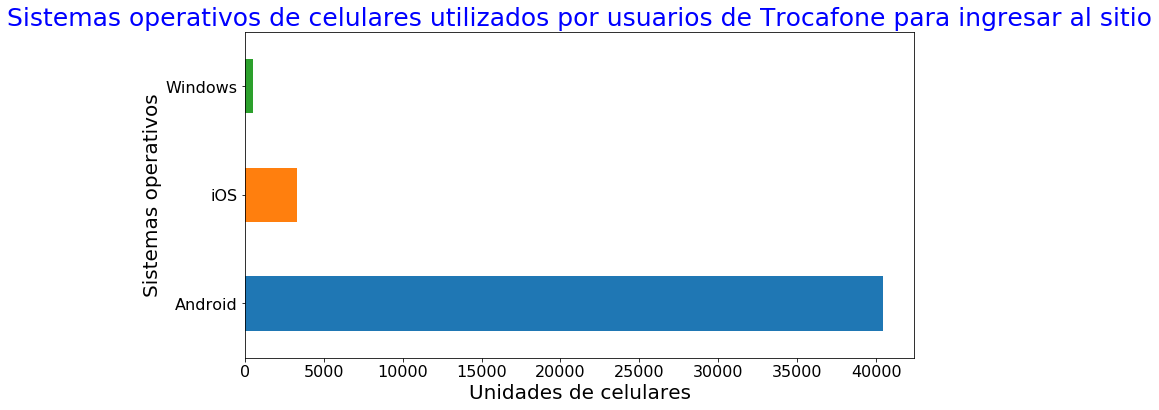

In [86]:
plot = celulares["Sistema operativo"].value_counts().plot(kind="barh",figsize=(12,6), fontsize=16)
plot.set_xlabel("Unidades de celulares",fontsize=20)
plot.set_ylabel("Sistemas operativos",fontsize=20)
plot.set_title("Sistemas operativos de celulares utilizados por usuarios de Trocafone para ingresar al sitio", fontsize=25,color ="blue")
plt.show()

###### Analizando los sistemas operativos desde donde se originan los eventos vemos que la mayoría de las personas que ingresan al sitio lo hacen desde un dispositivo Android. Esto lleva a pensar que si en algún momento se quisiera invertir en una aplicación móvil de Trocafone lo más conveniente sería arrancar por una que fuera compatible con dicho sistema operativo para tener la posibilidad de llegar a más personas.

## Análisis de los SO (computadoras)

In [87]:
eventosSO = eventos[["device_type", "operating_system_version"]]
computadoras = eventosSO.loc[eventosSO["device_type"]=="Computer"]

In [88]:
computadoras = computadoras.loc[computadoras["operating_system_version"] != "Other "]
computadoras["Sistema operativo"] = computadoras.apply( lambda x: str(x["operating_system_version"]).split()[0], axis = 1)
sisOpComputadoras = computadoras["Sistema operativo"].value_counts().reset_index()
sisOpComputadoras.columns = ['Sistema operativo','Cantidad']
sisOpComputadoras

,Sistema operativo,Cantidad
0,Windows,40998
1,Mac,406
2,Linux,289
3,Ubuntu,97


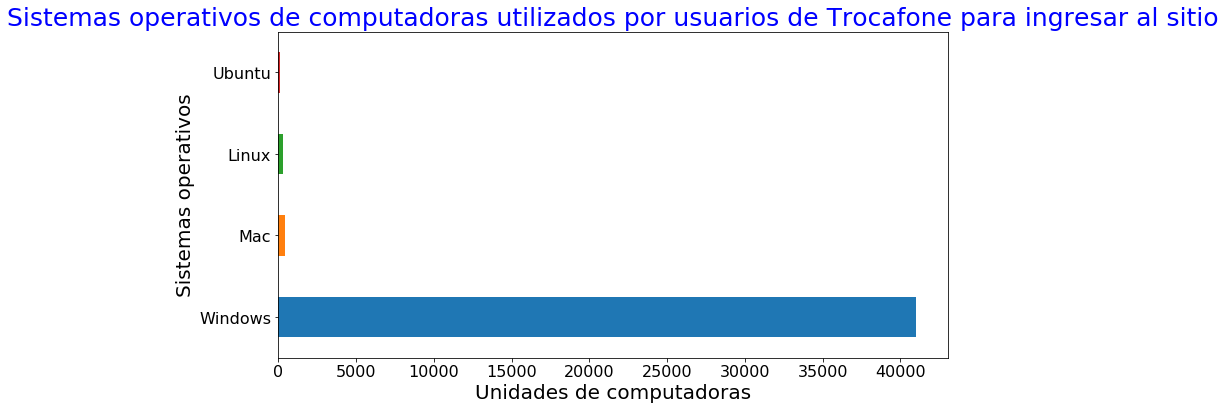

In [89]:
plot = computadoras["Sistema operativo"].value_counts().plot(kind="barh",figsize=(12,6), fontsize=16)
plot.set_xlabel("Unidades de computadoras",fontsize=20)
plot.set_ylabel("Sistemas operativos",fontsize=20)
plot.set_title("Sistemas operativos de computadoras utilizados por usuarios de Trocafone para ingresar al sitio", fontsize=25,color ="blue")
plt.show()

###### Se puede decir que prácticamente todos los usuarios de Trocafone que ingresan desde una computadora lo hacen con el sistema operativo Windows.

# Productos mas solicitados

In [90]:
eventos['sku'].value_counts().head(10)

2830.0     4282
2831.0     3770
2829.0     3709
8443.0     3506
12758.0    2939
2833.0     2908
6371.0     2628
5907.0     2602
3371.0     2574
9930.0     2540
Name: sku, dtype: int64

In [91]:
idProductosMasSolicitados = eventos['sku'].value_counts().head(10).reset_index()
listaidsMasSolicitados = idProductosMasSolicitados['index'].tolist()

In [92]:
productosMasSolicitados = eventos.loc[eventos['sku'].isin(listaidsMasSolicitados)]
productosMasSolicitados.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
104,2018-06-06 18:40:51,viewed product,001bb7eb,NaN,9930.0,iPhone 7,Bom,32GB,Preto Matte,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,2018-02-14 20:37:41,viewed product,00204059,NaN,2833.0,iPhone 6,Bom,64GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,2018-02-14 20:38:01,viewed product,00204059,NaN,2830.0,iPhone 6,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,2018-02-14 20:42:31,viewed product,00204059,NaN,2831.0,iPhone 6,Bom,16GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,2018-05-30 18:34:14,viewed product,002932b1,NaN,2833.0,iPhone 6,Bom,64GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
productosMasSolicitados = productosMasSolicitados.groupby(['sku','model','color','event']).agg(np.size)['person'].unstack(3).sort_values('viewed product',ascending=False)
productosMasSolicitados

,,event,checkout,conversion,viewed product
sku,model,color,,,
2830.0,iPhone 6,Cinza espacial,272.0,3.0,4007.0
2829.0,iPhone 6,Prateado,239.0,4.0,3466.0
2831.0,iPhone 6,Dourado,343.0,4.0,3423.0
8443.0,Samsung Galaxy S7,Preto,237.0,4.0,3265.0
12758.0,Samsung Galaxy S8,Preto,218.0,7.0,2714.0
2833.0,iPhone 6,Cinza espacial,219.0,4.0,2685.0
9930.0,iPhone 7,Preto Matte,125.0,NaN,2415.0
5907.0,iPhone 5s,Cinza espacial,198.0,NaN,2404.0
3371.0,Samsung Galaxy S6 Flat,Dourado,217.0,14.0,2343.0


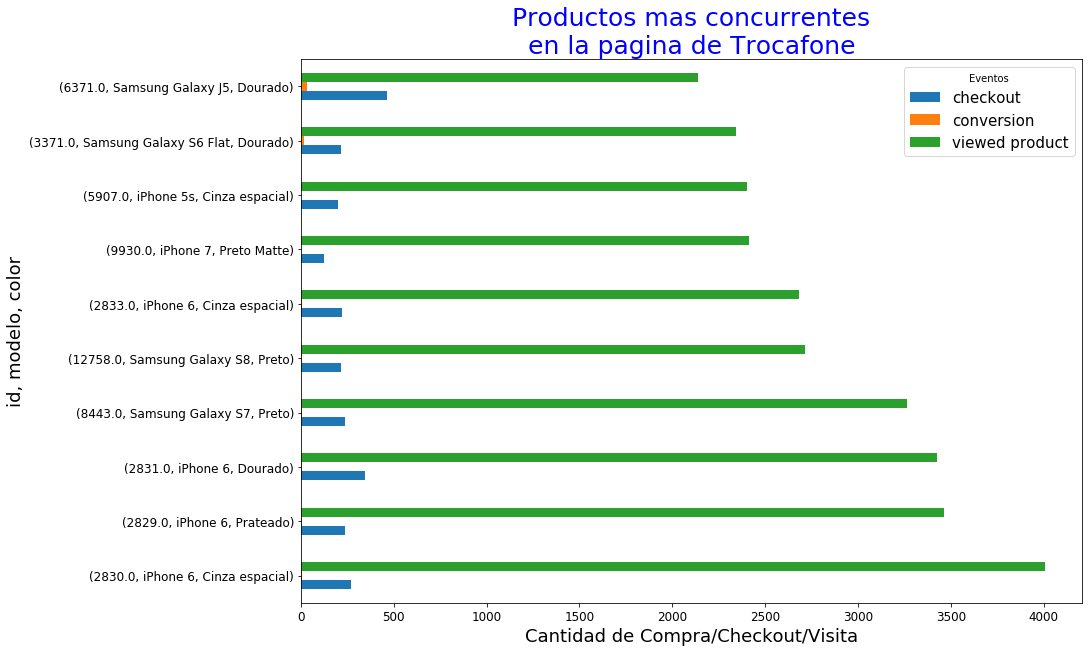

In [94]:
grafico = productosMasSolicitados.plot(kind='barh',figsize = (14,10), fontsize=12)
grafico.set_ylabel('id, modelo, color',fontsize=18)
grafico.set_xlabel('Cantidad de Compra/Checkout/Visita',fontsize=18)
grafico.set_title('Productos mas concurrentes\nen la pagina de Trocafone', fontsize=25,color = 'blue')
grafico.legend(fontsize=15,title='Eventos')
plt.show()

# Buscador por el cual los usuarios entran a la página de Trocafone

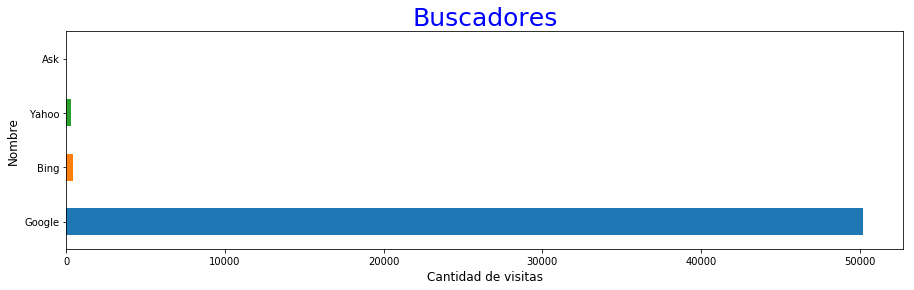

In [95]:
grafico = eventos.search_engine.value_counts().plot(kind='barh',figsize = (15,4))
grafico.set_ylabel('Nombre',fontsize=12)
grafico.set_xlabel('Cantidad de visitas',fontsize=12)
grafico.set_title('Buscadores', fontsize=25,color = 'blue')
plt.show()